### Analyse home use of robotic device


*import libraries*

In [1]:
import os
import sys
import sqlite3 as sl

import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

import math
import statistics
import scipy.stats
from scipy.fft import fft, fftfreq

from functools import reduce
import dataframe_image as dfi
from string import ascii_lowercase
import itertools

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.options.display.max_rows = 500

In [4]:
os.getcwd()

'C:\\Users\\USER\\Documents\\Articares\\CHISEL'

In [5]:
start_codes=datetime.now()

**import df from previously saved query**

In [6]:
# # read .dat file if df is saved
df = pd.read_csv('./data/sql_result_onlyP006.txt')
df_targets = pd.read_csv('./data/P006_targets.txt')

In [7]:
df.head()

,PatientID,SessionID,GameID,TimeStampDate,TimeStampMS,VisualTargetXCoord,VisualTargetYCoord,TargetXCoord,TargetYCoord,XCoordinate,YCoordinate,KxGain,KyGain,KxyGain,VelocityX,VelocityY,CurrentSenseLeft,CurrentSenseRight,TotalForce,Sparc
0,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,TTSH-CHISELCJytTGjHB0mo9zS9wUD+mA==,2,2022-05-13 12:51:26,4311827,159.0,247.0,0.0,0.0,0.161025,0.236725,0.0,0.0,0.0,0.000000,0.000000e+00,-0.0496,-0.024,0.000000,0.0
1,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,TTSH-CHISELCJytTGjHB0mo9zS9wUD+mA==,2,2022-05-13 12:51:26,4311842,159.0,247.0,0.0,0.0,0.160975,0.236725,0.0,0.0,0.0,-0.002514,-7.629395e-07,-0.0176,0.024,0.348561,0.0
2,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,TTSH-CHISELCJytTGjHB0mo9zS9wUD+mA==,2,2022-05-13 12:51:26,4311852,159.0,247.0,0.0,0.0,0.160975,0.236725,0.0,0.0,0.0,-0.002514,-7.629395e-07,-0.0176,0.024,0.348561,0.0
3,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,TTSH-CHISELCJytTGjHB0mo9zS9wUD+mA==,2,2022-05-13 12:51:26,4311862,159.0,247.0,0.0,0.0,0.160925,0.236725,0.0,0.0,0.0,-0.002513,1.907349e-07,-0.0176,0.024,0.348482,0.0
4,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,TTSH-CHISELCJytTGjHB0mo9zS9wUD+mA==,2,2022-05-13 12:51:26,4311872,159.0,247.0,0.0,0.0,0.160925,0.236725,0.0,0.0,0.0,-0.002513,1.907349e-07,-0.0176,0.024,0.348482,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5508742 entries, 0 to 5508741
Data columns (total 20 columns):
 #   Column              Dtype  
---  ------              -----  
 0   PatientID           object 
 1   SessionID           object 
 2   GameID              int64  
 3   TimeStampDate       object 
 4   TimeStampMS         int64  
 5   VisualTargetXCoord  float64
 6   VisualTargetYCoord  float64
 7   TargetXCoord        float64
 8   TargetYCoord        float64
 9   XCoordinate         float64
 10  YCoordinate         float64
 11  KxGain              float64
 12  KyGain              float64
 13  KxyGain             float64
 14  VelocityX           float64
 15  VelocityY           float64
 16  CurrentSenseLeft    float64
 17  CurrentSenseRight   float64
 18  TotalForce          float64
 19  Sparc               float64
dtypes: float64(15), int64(2), object(3)
memory usage: 840.6+ MB


**patient dictionary**

In [9]:
user_id_dict = {
    'TTSH-CHISELRGgLPwL3Lk6JTgBaVP4bjg==':'Test_01',
    'TTSH-CHISEL2gpumVcbJE267TKKceWbOA==':'NULL', 
    'TTSH-CHISEL0Pa/Gtc3DUqoPVREp+I/qg==':'001', 
    'TTSH-CHISEL9GsWU5zb50CfPyoLNy7qvg==':'002',
    'TTSH-CHISELamITRYYb9UymNH+3xzylgg==':'003', 
    'TTSH-CHISEL6IRO4pIMDUCpIRFbGnO26w==':'004',
    'TTSH-CHISELZSJj4EGZh0iiozqhx3Gf4g==':'005',
    'TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==':'006'
}; 


*replace PatientID from user_id_dict*

In [10]:
# df['PatientID'].unique()

for eg, if 'onlyP001' ie., only one patient is queried, then there should only be one unique value.

In [11]:
# replace PatientID with username
df.replace({'PatientID':user_id_dict},inplace=True)

In [12]:
# check PatientID replace
# df['PatientID'].unique()

**convert datetime**

In [13]:
df['date_time'] = pd.to_datetime(df['TimeStampDate'], format='%Y-%m-%d %H:%M:%S')
# df['date_time']

In [14]:
# check date_time column
# df['date_time'].dtypes

**check df for duplicates**

In [15]:
# df['TimeStampMS'].duplicated().value_counts()[True]

too many duplicates of TimeStampMS, since it is time (in ms) from datetime run time.

In [16]:
# df['SessionID'].unique()

In [17]:
# there is 'null' in 'SessionID'
# df['SessionID'].isnull().sum()

In [18]:
# where is the 'SessionID' missing
# df[df['SessionID'].isnull()]

some 'SessionID' are missing, nothing we can do about it, though possible to impute from neighbouring rows.

In [19]:
# remove SessionID when null
df = df[df['SessionID'].notna()]

**format VisualTargetCoord and TargetCoord**

In [20]:
df['VisualTargetXCoord'] = df['VisualTargetXCoord']/1000
df['VisualTargetYCoord'] = df['VisualTargetYCoord']/1000
df['TargetXCoord'] = df['TargetXCoord']/1000
df['TargetYCoord'] = df['TargetYCoord']/1000

*GameID*

In [21]:
game_id_dict = {
    0 : 'Explore the World',
    1 : 'Fishing Game',
    2 : 'Drone Game'
}

In [22]:
# check types of games played
df['GameID'].unique()

array([2, 1, 0], dtype=int64)

### Segregating dataset by session and game

In [23]:
# make copy of original df
df1 = df.reset_index()

In [24]:
# # keep only patient of interest (if P001), drop everything else
# # does not matter if early queries only on one patient
# searchfor = ['Test_','NULL','003','002']
# df1 = df1[df1['PatientID'].str.contains('Test_|NULL')==False].reset_index()
# df1

In [25]:
# recalculate diff in timestamp, as freq of data capture is inconsistent
df1['TimeStampMS_diff'] = df1[['TimeStampMS']].diff()

In [26]:
list_sessions = df1[df1['SessionID'].notna()]['SessionID'].unique()

**checking for new starts within each session**
<br> correcting for indirect labelling of sessionID

In [27]:
# create new session names
new_session_name = []
def iter_all_strings():
    for size in itertools.count(1):
        for s in itertools.product(ascii_lowercase, repeat=size):
            yield ''.join(s)

# max 300 new session names based on alphabet-combinations
for s in itertools.islice(iter_all_strings(), 300):
    new_session_name.append(s)

*splitting sessionID based on 'TimeStampMS_diff'<0*

In [28]:
# check for negative timestamp
new = 0
for session in list_sessions:
    session_temp = df1[df1['SessionID']==session].reset_index().drop(columns=['level_0'])
    
    # drop all last index, to make life easier
    last_index=session_temp['index'].iloc[-1]
    session_temp.drop(session_temp[(session_temp['index'] == last_index)].index,axis=0,inplace=True)
    df1.drop(df1[(df1['index'] == last_index)].index,axis=0,inplace=True)
    
    for game in range(0,session_temp['GameID'].nunique()):
        if game in session_temp['GameID'].unique():
            temp3 = session_temp[session_temp['GameID']==game]
            temp3['TimeStampMS_diff'] = temp3[['TimeStampMS']].diff()

            # should not include last index already removed
            idx = temp3[temp3['TimeStampMS_diff']<0]['index'].values

            if len(idx) >= 1:
                first_index=temp3['index'].iloc[0]
                # new last_index iloc[-2]
                last_index=temp3['index'].iloc[-1]

                if len(idx)==1:
                    # check first index
                    if idx[0] == first_index:
                        pass
                    # double check last index
                    # nothing should happen here
                    elif idx[-1] == last_index:
                        # drop last value of sessionid
                        df1.drop(df1[(df1['index'] == last_index)].index,axis=0,inplace=True)
        #                 idx = idx[:-1]
                    # index is middle
                    else: #(idx[0]!=first_index) or (idx[0]!=last_index):
                        df1.loc[(df1['index'] >= idx[0]) & (df1['index'] <= last_index), 'SessionID'] = new_session_name[new]
                        print(1,session,game,new_session_name[new])
                        new += 1

                else:                
                    for nr in range(len(idx)-1):
                        df1.loc[(df1['index'] >= idx[nr]) & (df1['index'] <= idx[nr+1]), 'SessionID'] = new_session_name[new]
                        print(2,session,game,new_session_name[new])
                        new += 1


*splitting sessionID once more for 'TimeStampMS_diff' > 120s*

In [29]:
# updated list_sessions
list_sessions = df1[df1['SessionID'].notna()]['SessionID'].unique()

In [30]:
# double check
# check for negative timestamp
for session in list_sessions:
    session_temp = df1[df1['SessionID']==session].reset_index().drop(columns=['level_0'])
    
    for game in range(0,session_temp['GameID'].nunique()):
        if game in session_temp['GameID'].unique():
            temp3 = session_temp[session_temp['GameID']==game]
            temp3['TimeStampMS_diff'] = temp3[['TimeStampMS']].diff()

            # should not include last index already removed
            idx = temp3[temp3['TimeStampMS_diff']<0]['index'].values

            if len(idx) >= 1:
                first_index=temp3['index'].iloc[0]
                # new last_index iloc[-2]
                last_index=temp3['index'].iloc[-1]

                if len(idx)==1:
                    # check first index
                    if idx[0] == first_index:
                        pass
                    # double check last index
                    # nothing should happen here
                    elif idx[-1] == last_index:
                        # drop last value of sessionid
                        df1.drop(df1[(df1['index'] == last_index)].index,axis=0,inplace=True)
        #                 idx = idx[:-1]
                    # index is middle
                    else: #(idx[0]!=first_index) or (idx[0]!=last_index):
                        df1.loc[(df1['index'] >= idx[0]) & (df1['index'] <= last_index), 'SessionID'] = new_session_name[new]
                        print(1,session,game,new_session_name[new])
                        new += 1

                else:                
                    for nr in range(len(idx)-1):
                        df1.loc[(df1['index'] >= idx[nr]) & (df1['index'] <= idx[nr+1]), 'SessionID'] = new_session_name[new]
                        print(2,session,game,new_session_name[new])
                        new += 1


In [31]:
# updated list_sessions
list_sessions = df1[df1['SessionID'].notna()]['SessionID'].unique()

In [32]:
# check for large time gaps between sessions
# use 'new' from previous run of splitting sessionID
for session in list_sessions:
    session_temp = df1[df1['SessionID']==session].reset_index().drop(columns=['level_0'])
    for game in range(0,session_temp['GameID'].nunique()):
        if game in session_temp['GameID'].unique():
            temp3 = session_temp[session_temp['GameID']==game]
            temp3['TimeStampMS_diff'] = temp3[['TimeStampMS']].diff()
            
            idx2 = temp3[temp3['TimeStampMS_diff']>=100000]['index'].values
            
            if len(idx2) >= 1:
                first_index=temp3['index'].iloc[0]
                last_index=temp3['index'].iloc[-1]

                if len(idx2)==1:
                    # check first index
                    if idx2[0] == first_index:
                        pass          
                    # check last index
                    elif (idx2[-1] == last_index):
                        # drop last value of idx 
                        df1.drop(df1[(df1['index'] == last_index)].index,axis=0,inplace=True)
                    # index is middle
                    else: #(idx2[0]!=first_index) or (idx2[0]!=last_index):
                        df1.loc[(df1['index'] >= idx2[0]) & (df1['index'] <= last_index), 'SessionID'] = new_session_name[new]
#                         print(1,session,game,new_session_name[new])
                        new += 1

                else:                   
                    for nr in range(len(idx2)-1):
                        df1.loc[(df1['index'] >= idx2[nr]) & (df1['index'] <= idx2[nr+1]), 'SessionID'] = new_session_name[new]
#                         print(2,session,game,new_session_name[new])
                        new += 1


In [33]:
# updated list_sessions
list_sessions = df1[df1['SessionID'].notna()]['SessionID'].unique()

In [34]:
# quad run
# double check for large time gaps between sessions
for session in list_sessions:
    session_temp = df1[df1['SessionID']==session].reset_index().drop(columns=['level_0'])
    for game in range(0,session_temp['GameID'].nunique()):
        if game in session_temp['GameID'].unique():
            temp3 = session_temp[session_temp['GameID']==game]
            temp3['TimeStampMS_diff'] = temp3[['TimeStampMS']].diff()
            
            idx2 = temp3[temp3['TimeStampMS_diff']>=100000]['index'].values
            
            if len(idx2) >= 1:
                first_index=temp3['index'].iloc[0]
                last_index=temp3['index'].iloc[-1]

                if len(idx2)==1:
                    # check first index
                    if idx2[0] == first_index:
                        pass          
                    # check last index
                    elif (idx2[-1] == last_index):
                        # drop last value of idx 
                        df1.drop(df1[(df1['index'] == last_index)].index,axis=0,inplace=True)
                    # index is middle
                    else: #(idx2[0]!=first_index) or (idx2[0]!=last_index):
                        df1.loc[(df1['index'] >= idx2[0]) & (df1['index'] <= last_index), 'SessionID'] = new_session_name[new]
#                         print(1,session,game,new_session_name[new])
                        new += 1

                else:                   
                    for nr in range(len(idx2)-1):
                        df1.loc[(df1['index'] >= idx2[nr]) & (df1['index'] <= idx2[nr+1]), 'SessionID'] = new_session_name[new]
#                         print(2,session,game,new_session_name[new])
                        new += 1


In [35]:
# updated list_sessions
list_sessions = df1[df1['SessionID'].notna()]['SessionID'].unique()

#### remove invalid gameplays

In [36]:
# time duration
for session in list_sessions:
    session_temp = df1[df1['SessionID']==session].reset_index().drop(columns=['level_0'])
    for game in range(0,session_temp['GameID'].nunique()):
        if game in session_temp['GameID'].unique():
            temp3 = session_temp[session_temp['GameID']==game]
#             temp3['TimeStampMS_diff'] = temp3[['TimeStampMS']].diff()
            temp3['tsec'] = temp3[['TimeStampMS']].diff().cumsum(axis=0)/1000
            
            first_index=temp3['index'].iloc[0]
            last_index=temp3['index'].iloc[-1]
            
            # drop if session < 120s or smaller than size 5
            if len(temp3['tsec'])>=5:
#             print(session, game, temp3['tsec'].iloc[-2])
                if temp3['tsec'].iloc[-2] <= 120:
                    df1.drop(df1[(df1['index'] >= first_index) & (df1['index'] <= last_index)].index,axis=0,inplace=True)
            else:
                df1.drop(df1[(df1['index'] >= first_index) & (df1['index'] <= last_index)].index,axis=0,inplace=True)

#### keep final sessions in df within a list

In [37]:
# # updated list_sessions
list_sessions = df1[df1['SessionID'].notna()]['SessionID'].unique()

df_session = []
for session in list_sessions:
    temp = df1[df1['SessionID']==session]  
    df_session.append(temp)

### EDA

**declare path for saving fig**
<br> path/folder will change later, and declared again later

In [38]:
patientid = df['PatientID'].unique()[0]
main_results_path = os.path.join('data', 'results', patientid)
if not os.path.exists(main_results_path):
    os.makedirs(main_results_path)

*create dataframe*

In [39]:
# sessions have increased, since new session are created when new starts to gameplay were detected
len(df_session)

56

In [40]:
# number of games played
df1['GameID'].unique()

array([2, 1, 0], dtype=int64)

In [41]:
session_nr = []
game_nr = []
start = []
end = []
diff = []
for session, df_list in enumerate(df_session):
    for game in range(0,df1['GameID'].nunique()):
        if game in df_list['GameID'].unique():
            session_nr.append(session)
            game_nr.append(game)
            temp = df_list[df_list['GameID']==game]
            
            start.append(temp[['date_time']].iloc[0][0])
            end.append(temp[['date_time']].iloc[-1][0])
            time_diff = (temp[['date_time']].iloc[-1][0]) - (temp[['date_time']].iloc[0][0])
            diff.append(time_diff/ np.timedelta64(1,'m'))    # in minutes
        

In [42]:
# put in df
time_session = []
for row in range(0,len(session_nr)):
    time_session.append(row)
time_session = pd.DataFrame(time_session,columns=['session_nr'])   
time_session['session_nr'] = session_nr
time_session['game_nr'] = game_nr
time_session['start'] = start
time_session['end'] = end
time_session['diff'] = diff  # in minutes
time_session['just_date'] = time_session['start'].dt.date

In [43]:
time_session

,session_nr,game_nr,start,end,diff,just_date
0,0,2,2022-05-13 12:51:26,2022-05-13 12:51:32,0.100000,2022-05-13
1,1,1,2022-05-13 12:54:12,2022-05-13 12:54:21,0.150000,2022-05-13
2,2,2,2022-05-13 18:07:33,2022-05-13 18:23:12,15.650000,2022-05-13
3,3,0,2022-05-14 18:09:40,2022-05-14 18:19:51,10.183333,2022-05-14
4,3,1,2022-05-14 18:20:14,2022-05-14 18:30:20,10.100000,2022-05-14
5,3,2,2022-05-14 18:32:17,2022-05-14 18:43:28,11.183333,2022-05-14
6,4,0,2022-05-14 19:05:26,2022-05-14 19:16:53,11.450000,2022-05-14
7,4,1,2022-05-14 19:17:37,2022-05-14 19:29:26,11.816667,2022-05-14
8,5,2,2022-05-14 20:28:44,2022-05-14 20:48:56,20.200000,2022-05-14
9,6,0,2022-05-15 07:50:56,2022-05-15 08:10:12,19.266667,2022-05-15


In [44]:
# dfi.export(time_session,"time_session.png")
# dfi.export(time_session[time_session['game_nr']==0],"time_explore.png")
# dfi.export(time_session[time_session['game_nr']==1],"time_fish.png")
# dfi.export(time_session[time_session['game_nr']==2],"time_drone.png")

#### number of targets (from GameSession table)


In [45]:
df_targets.head()

,PatientID,Score,Strength,Coordination,Agility,SessionTime,SessionID,NumberOfTargets,CreatedDate
0,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,22.0,90.000000,47.782007,36.587932,0.105858,TTSH-CHISELCJytTGjHB0mo9zS9wUD+mA==,3,2022-05-13 04:51:43
1,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,4.0,-1.000000,82.718265,30.927633,0.146582,TTSH-CHISEL49l6A4YNIUKlgrfpd81V6Q==,1,2022-05-13 04:54:31
2,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,3912.0,76.429504,45.177369,13.062145,15.236070,TTSH-CHISELugL3DxELE0eZjcBnurRzwA==,461,2022-05-13 10:23:22
3,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,4313.0,66.936707,42.048936,38.771131,31.116016,TTSH-CHISELy0I7yzluAE23FF63m+IH6A==,743,2022-05-14 10:43:42
4,TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==,1776.0,66.448135,40.479520,31.291117,23.131092,TTSH-CHISELFZdp5pooS02/Lf7vPNdjqQ==,471,2022-05-14 12:27:32


In [46]:
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PatientID        34 non-null     object 
 1   Score            34 non-null     float64
 2   Strength         34 non-null     float64
 3   Coordination     34 non-null     float64
 4   Agility          34 non-null     float64
 5   SessionTime      34 non-null     float64
 6   SessionID        34 non-null     object 
 7   NumberOfTargets  34 non-null     int64  
 8   CreatedDate      34 non-null     object 
dtypes: float64(5), int64(1), object(3)
memory usage: 2.5+ KB


In [47]:
df_targets.replace({'PatientID':user_id_dict},inplace=True)
df_targets['date_time'] = pd.to_datetime(df_targets['CreatedDate'], format='%Y-%m-%d %H:%M:%S')
df_targets['just_date'] = df_targets['date_time'].dt.date

In [48]:
targets_groupsession = df_targets.groupby(['just_date']).sum().reset_index()
targets_groupsession

,just_date,Score,Strength,Coordination,Agility,SessionTime,NumberOfTargets
0,2022-05-13,3938.0,165.429504,175.677642,80.577710,15.488509,465
1,2022-05-14,10989.0,209.814903,128.710132,98.017300,74.442083,1797
2,2022-05-15,10889.0,169.147232,124.610520,149.006682,93.724401,2084
3,2022-05-16,12794.0,150.702850,85.400177,61.339194,89.654608,2130
4,2022-05-17,13901.0,157.728432,85.422495,106.945924,87.888329,2242
5,2022-05-18,13265.0,160.045616,83.881468,76.574235,81.420086,2100
6,2022-05-19,13661.0,200.310188,126.887923,105.649686,91.005131,2307
7,2022-05-20,10201.0,151.357819,85.145200,71.717060,72.024746,1678
8,2022-05-21,12983.0,139.742241,84.168812,97.146822,79.413845,2141
9,2022-05-23,15607.0,141.148811,84.853755,81.868207,94.468332,2519


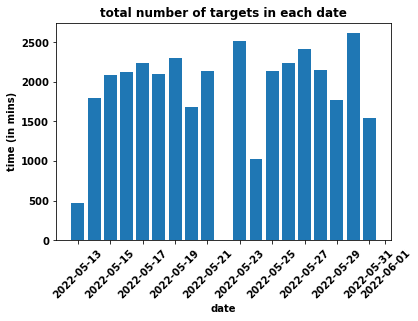

In [49]:
# plot number of targets by date
plt.bar(targets_groupsession['just_date'],targets_groupsession['NumberOfTargets']);
plt.xlabel('date')
plt.xticks(rotation=45)
# plt.yticks(range(0,20))
# plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(2))
plt.ylabel('time (in mins)');
# plt.ylim(top=1000)
plt.title('total number of targets in each date');

plt.savefig(main_results_path + '\\total_targets_session.png',bbox_inches = "tight")
plt.show();

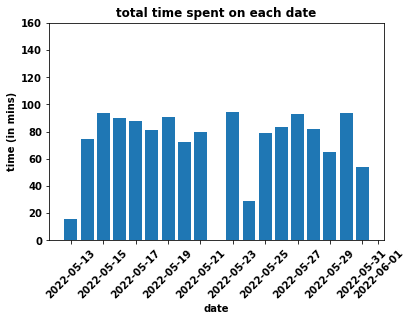

In [50]:
# plot time spent by date
plt.bar(targets_groupsession['just_date'],targets_groupsession['SessionTime']);
plt.xlabel('date')
plt.xticks(rotation=45)
# plt.yticks(range(0,20))
# plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(2))
plt.ylabel('time (in mins)');
plt.ylim(top=160)
plt.title('total time spent on each date');

plt.savefig(main_results_path + '\\total_time_date_targetsdf.png',bbox_inches = "tight")
plt.show();

#### time duration (from cleaned dataset, from original table)

##### time spend per session

In [51]:
time_groupsession = time_session.groupby(['just_date']).sum().reset_index()
time_groupsession.drop(columns=['session_nr','game_nr'])

,just_date,diff
0,2022-05-13,15.900000
1,2022-05-14,74.933333
2,2022-05-15,104.400000
3,2022-05-16,90.483333
4,2022-05-17,87.616667
5,2022-05-18,41.000000
6,2022-05-19,90.416667
7,2022-05-20,72.116667
8,2022-05-21,79.383333
9,2022-05-23,94.933333


**number of active days playing**

In [52]:
active_days = time_groupsession['just_date'].count()
print(f'total number of days played = {active_days} days')

total number of days played = 18 days


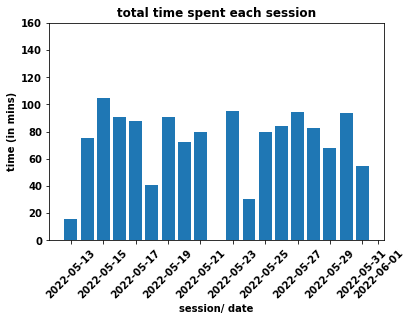

In [53]:
# plot number of games by session
plt.bar(time_groupsession['just_date'],time_groupsession['diff']);
plt.xlabel('session/ date')
plt.xticks(rotation=45)
# plt.yticks(range(0,20))
# plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(2))
plt.ylabel('time (in mins)');
plt.ylim(top=160)
plt.title('total time spent each session');

plt.savefig(main_results_path + '\\total_time_session.png',bbox_inches = "tight")
plt.show();

##### total time spent on play

In [54]:
total_time = time_session[['diff']].sum()
print(f'total time spent = {total_time[0]:.2f} mins')

total time spent = 1338.87 mins


In [55]:
days = math.floor(total_time[0] / (24*60))
leftover_minutes = total_time[0] % (24*60)

hours = math.floor(leftover_minutes / 60)
mins = total_time[0] - (days*1440) - (hours*60)

print(f'total time spent = {days} days, {hours:.2f} hours, {mins:.2f} mins')

total time spent = 0 days, 22.00 hours, 18.87 mins


##### time spend by game

In [56]:
time_gamesession = time_session.groupby(['game_nr']).sum().reset_index()
time_gamesession.index = time_gamesession.index.map(game_id_dict)
time_gamesession.drop(columns=['session_nr'])

,game_nr,diff
Explore the World,0,400.600000
Fishing Game,1,429.933333
Drone Game,2,508.333333


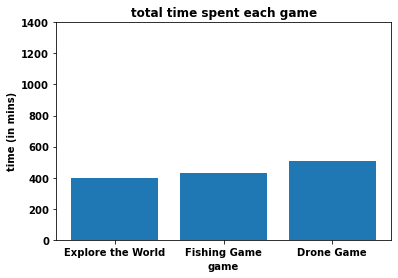

In [58]:
### plot number of games by session
plt.bar(time_gamesession.index,time_gamesession['diff']);
plt.xlabel('game')
plt.ylabel('time (in mins)');
plt.title('total time spent each game');
plt.ylim(top=1400)
plt.savefig(main_results_path + '\\total_time_game.png',bbox_inches = "tight")
plt.show();

##### session dates by game

In [59]:
date_game0 = time_session[time_session['game_nr']==0].groupby(['just_date']).sum().reset_index()
date_game0.drop(columns=['session_nr','game_nr'])

,just_date,diff
0,2022-05-14,21.633333
1,2022-05-15,35.133333
2,2022-05-16,29.550000
3,2022-05-17,26.550000
4,2022-05-18,5.316667
5,2022-05-19,27.066667
6,2022-05-20,25.600000
7,2022-05-21,23.166667
8,2022-05-23,30.000000
9,2022-05-25,26.816667


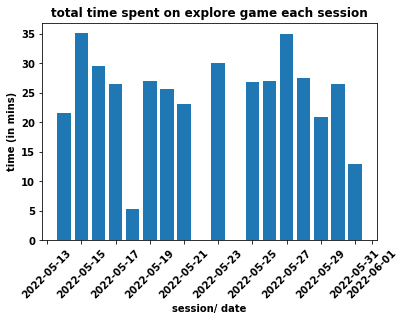

In [60]:
# plot explore game play by session
plt.bar(date_game0['just_date'],date_game0['diff']);
plt.xlabel('session/ date')
plt.xticks(rotation=45)
plt.ylabel('time (in mins)');
plt.title('total time spent on explore game each session');

plt.savefig(main_results_path + '\\total_time_explore.png',bbox_inches = "tight")
plt.show();

In [61]:
date_game1 = time_session[time_session['game_nr']==1].groupby(['just_date']).sum().reset_index()
date_game1.drop(columns=['session_nr','game_nr'])

,just_date,diff
0,2022-05-13,0.150000
1,2022-05-14,21.916667
2,2022-05-15,35.400000
3,2022-05-16,30.300000
4,2022-05-17,34.816667
5,2022-05-18,10.016667
6,2022-05-19,32.100000
7,2022-05-20,20.600000
8,2022-05-21,30.083333
9,2022-05-23,31.416667


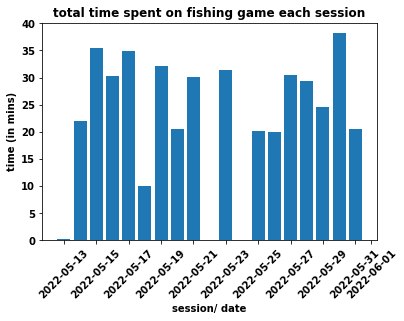

In [62]:
# plot explore game play by session
plt.bar(date_game1['just_date'],date_game1['diff']);
plt.xlabel('session/ date')
plt.xticks(rotation=45)
plt.ylabel('time (in mins)');
plt.title('total time spent on fishing game each session');

plt.savefig(main_results_path + '\\total_time_fish.png',bbox_inches = "tight")
plt.show();

In [63]:
date_game2 = time_session[time_session['game_nr']==2].groupby(['just_date']).sum().reset_index()
date_game2.drop(columns=['session_nr','game_nr'])

,just_date,diff
0,2022-05-13,15.750000
1,2022-05-14,31.383333
2,2022-05-15,33.866667
3,2022-05-16,30.633333
4,2022-05-17,26.250000
5,2022-05-18,25.666667
6,2022-05-19,31.250000
7,2022-05-20,25.916667
8,2022-05-21,26.133333
9,2022-05-23,33.516667


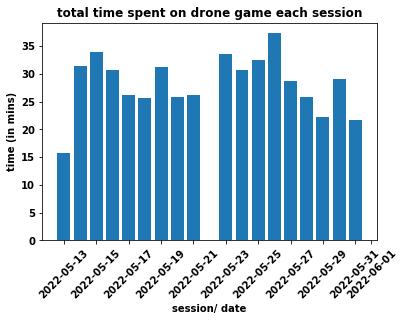

In [64]:
# plot explore game play by session
plt.bar(date_game2['just_date'],date_game2['diff']);
plt.xlabel('session/ date')
plt.xticks(rotation=45)
plt.ylabel('time (in mins)');
plt.title('total time spent on drone game each session');

plt.savefig(main_results_path + '\\total_time_drone.png',bbox_inches = "tight")
plt.show();

**plot all games by session**

In [65]:
dfs = reduce(lambda x,y: pd.merge(x,y, on='just_date', how='outer'), [date_game0, date_game1, date_game2]).fillna(0)
dfs.drop(columns=['session_nr_x','session_nr_y','session_nr','game_nr_x','game_nr_y','game_nr'],inplace=True)

In [66]:
dfs.rename(columns={'diff_x': 'explore',
                    'diff_y': 'fish',
                   'diff': 'drone'}, inplace=True)
dfs = dfs.set_index(['just_date'])
# dfs

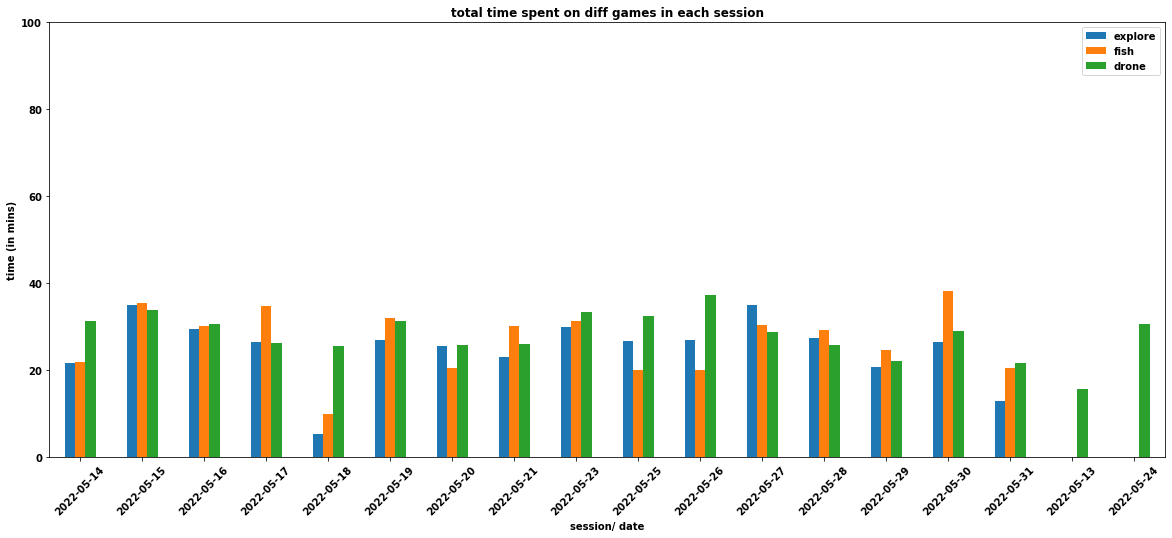

In [67]:
dfs.plot.bar(figsize=(20,8))
plt.xlabel('session/ date')
plt.xticks(rotation=45)
plt.ylabel('time (in mins)');
plt.ylim(top=100)
plt.title('total time spent on diff games in each session');

plt.savefig(main_results_path + '\\total_time_game_separate.png',bbox_inches = "tight")
plt.show();

##### number of times each game was played

In [68]:
time_gamecount = time_session.groupby(['game_nr']).count().reset_index()
time_gamecount.index = time_gamecount.index.map(game_id_dict)
time_gamecount.drop(columns=['session_nr','end','diff','just_date'])

,game_nr,start
Explore the World,0,34
Fishing Game,1,36
Drone Game,2,34


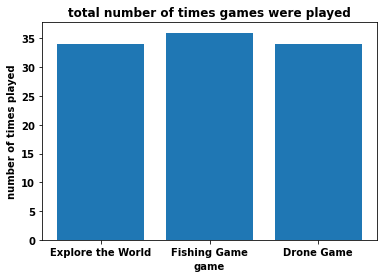

In [69]:
# plot number of games by session
plt.bar(time_gamecount.index,time_gamecount['session_nr']);
plt.xlabel('game')
plt.ylabel('number of times played');
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(5))
plt.title('total number of times games were played');

plt.savefig(main_results_path + '\\times_played_game.png',bbox_inches = "tight")
plt.show();

**save outputs to txt file**

In [70]:
with open(main_results_path + '\\outputs.txt', mode='w') as file_:
    file_.write(f'total number of days played = {active_days} days')
    file_.write("\n")  # Next line.
    file_.write(f'total time spent = {total_time[0]:.2f} mins')
    file_.write("\n")  
    file_.write(f'total time spent = {days} days, {hours:.2f} hours, {mins:.2f} mins')
    file_.write("\n")  

#### Mean/std of Sparc, Total force, velocity

In [71]:
session_nr = []
game_nr = []
sparc_mean =[]
sparc_std =[]
Ftot_mean = []
Ftot_std = []
vel_mean = []
veldb_mean = []
veldb_std = []
vel_diff = []

for session, df in enumerate(df_session):
    for game in range(0,df1['GameID'].nunique()):
        if game in df['GameID'].unique():
            df_game = df[df['GameID']==game]
            session_nr.append(session)
            game_nr.append(game)
            sparc_mean.append(df_game[['Sparc']].mean().values[0])
            sparc_std.append(df_game[['Sparc']].std().values[0])
            Ftot_mean.append(df_game[['TotalForce']].mean().values[0])
            Ftot_std.append(df_game[['TotalForce']].std().values[0])
            
            # vel from coord 
            # note coord in m
            df_game[['TimeStampMS_diff','x_diff','y_diff']]=df_game[['TimeStampMS','XCoordinate','YCoordinate']].diff()
            df_game['step_size'] = np.sqrt(df_game['x_diff']**2+df_game['y_diff']**2)
            # vel in m/sec
            vel_mean.append((df_game['step_size'].sum())/(df_game['TimeStampMS_diff'].sum()/1000))
            
            # vel from velX and velY from db?
            df_game['vel_db'] = np.sqrt(df_game['VelocityX']**2+df_game['VelocityY']**2)
            veldb_mean.append(df_game[['vel_db']].mean().values[0])
            veldb_std.append(df_game[['vel_db']].std().values[0])
            
            # vel difference within session
            vel_diff.append((np.array_split(df_game['vel_db'],4)[3].mean()) - (np.array_split(df_game['vel_db'],4)[0].mean()))


In [72]:
# put in df
gen_parameters = []
for row in range(0,len(session_nr)):
    gen_parameters.append(row)
gen_parameters = pd.DataFrame(gen_parameters,columns=['session_nr'])   
gen_parameters['session_nr'] = session_nr
gen_parameters['game_nr'] = game_nr
gen_parameters['sparc_mean'] = sparc_mean
gen_parameters['sparc_std'] = sparc_std
gen_parameters['Ftot_mean'] = Ftot_mean
gen_parameters['Ftot_std'] = Ftot_std
gen_parameters['vel_mean'] = vel_mean
gen_parameters['veldb_mean'] = veldb_mean
gen_parameters['veldb_std'] = veldb_std
gen_parameters['vel_diff'] = vel_diff

In [73]:
# gen_parameters

##### Plot mean Sparc

In [74]:
gen_explore = gen_parameters[gen_parameters['game_nr']==0]
gen_fish = gen_parameters[gen_parameters['game_nr']==1]
gen_drone = gen_parameters[gen_parameters['game_nr']==2]

**explore game**

In [75]:
# gen_explore

In [76]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 15,
        }

0 0.5 Decrease in smoothness (ie., SPARC is more negative) by linear coefficient of -0.001 as gameplay progresses.


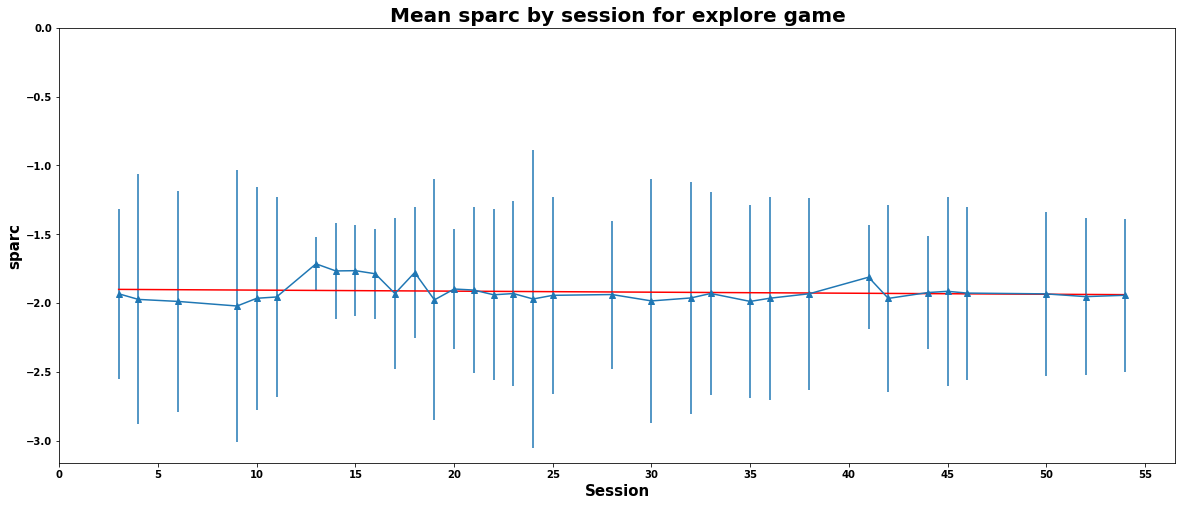

In [77]:
plt.figure(figsize=(20,8))
plt.errorbar(gen_explore['session_nr'],gen_explore['sparc_mean'],gen_explore['sparc_std'], marker='^')
plt.xlim(left=0);
plt.xlabel('Session',fontsize=15)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.ylim(top=0)

# plot trendline (just a linear fitting)
z = np.polyfit(gen_explore['session_nr'],gen_explore['sparc_mean'], 1)
p = np.poly1d(z)
plt.plot(gen_explore['session_nr'],p(gen_explore['session_nr']),'r-')
# print('y=%.6fx+(%.6f)'%(z[0],z[1]))

if z[0] > 0:
    print(0,0.5,f'Smoothness increase (ie., SPARC is less negative) by linear coefficient of {z[0]:.3f} as gameplay progresses.')
else:
    print(0,0.5,f'Decrease in smoothness (ie., SPARC is more negative) by linear coefficient of {z[0]:.3f} as gameplay progresses.')

plt.ylabel('sparc',fontsize=15)

plt.title('Mean sparc by session for explore game',fontsize=20)

plt.savefig(main_results_path + '\\sparc_explore.png',bbox_inches = "tight")
plt.show();

0 0.5 Smoothness increase (ie., SPARC is less negative) by linear coefficient of 0.001 as gameplay progresses.


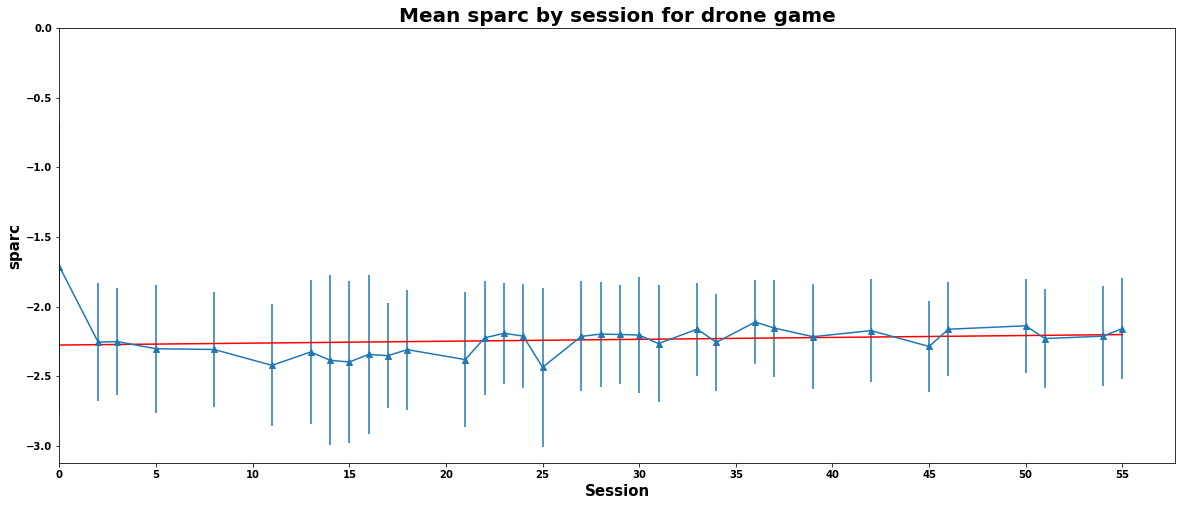

In [78]:
plt.figure(figsize=(20,8))
plt.errorbar(gen_drone['session_nr'],gen_drone['sparc_mean'],gen_drone['sparc_std'], marker='^')
plt.xlim(left=0);
plt.xlabel('Session',fontsize=15)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.ylim(top=0)

# plot trendline (just a linear fitting)
z = np.polyfit(gen_drone['session_nr'],gen_drone['sparc_mean'], 1)
p = np.poly1d(z)
plt.plot(gen_drone['session_nr'],p(gen_drone['session_nr']),'r-')

if z[0] > 0:
    print(0,0.5,f'Smoothness increase (ie., SPARC is less negative) by linear coefficient of {z[0]:.3f} as gameplay progresses.')
else:
    print(0,0.5,f'Decrease in smoothness (ie., SPARC is more negative) by linear coefficient of {z[0]:.3f} as gameplay progresses.')

plt.ylabel('sparc',fontsize=15)
plt.title('Mean sparc by session for drone game',fontsize=20)

plt.savefig(main_results_path + '\\sparc_drone.png',bbox_inches = "tight")
plt.show();

##### Plot mean total force
only for explore game

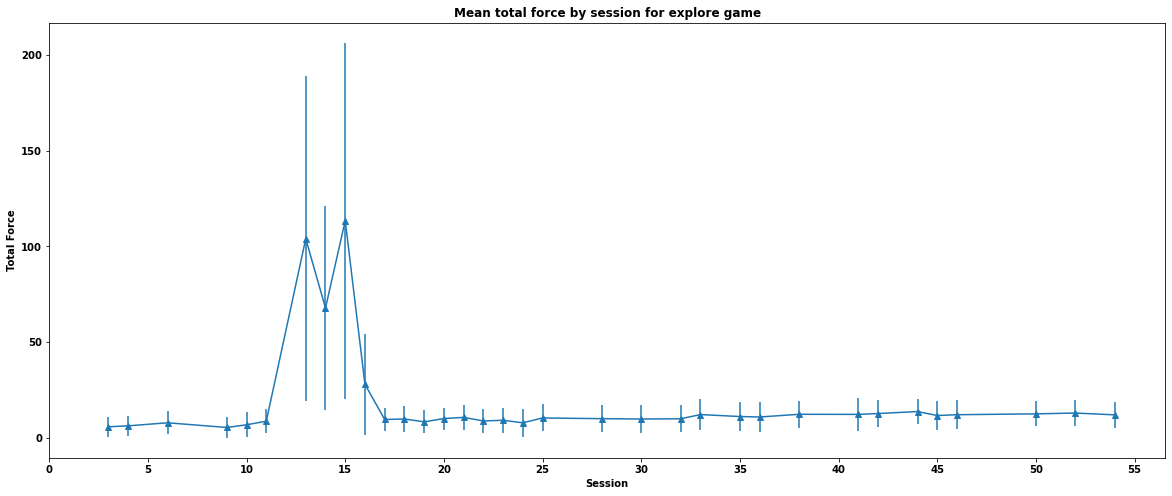

In [79]:
plt.figure(figsize=(20,8))
plt.errorbar(gen_explore['session_nr'],gen_explore['Ftot_mean'],gen_explore['Ftot_std'], marker='^')
plt.xlim(left=0);
plt.xlabel('Session')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.ylabel('Total Force')
plt.title('Mean total force by session for explore game')

plt.savefig(main_results_path + '\\Ftotal_explore.png',bbox_inches = "tight")
plt.show();

##### Plot mean velocity (by session)

In [80]:
ex = gen_explore['vel_mean'].mean()
fish = gen_fish['vel_mean'].mean()
dr = gen_drone['vel_mean'].mean()
mean_max_vel=max([ex,fish,dr])
max_vel = gen_parameters['vel_mean'].max()
max_std = gen_parameters['veldb_std'].max()

if ex==mean_max_vel:
    max_vel_game='explore'
elif fish==mean_max_vel:
    max_vel_game='fish'
elif dr==mean_max_vel:
    max_vel_game='drone'
    
print(f'Max mean velocity of {max_vel:.3f} m/s occurred during {max_vel_game} game')

max_ylim = max_vel+(3*max_std)
min_ylim = max_vel-(3*max_std)

Max mean velocity of 0.239 m/s occurred during fish game


In [81]:
# save to outputs file
with open(main_results_path + '\\outputs.txt', mode='a') as file_:
    file_.write(f'Max mean velocity of {max_vel:.3f} m/s occurred during {max_vel_game} game')
    file_.write("\n")  # Next line.

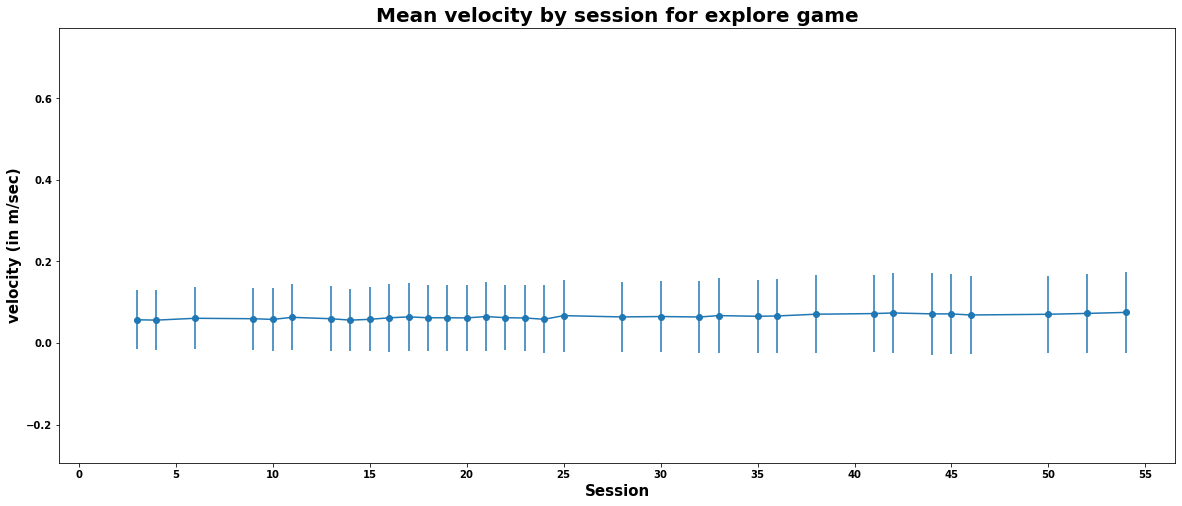

In [82]:
plt.figure(figsize=(20,8))
plt.errorbar(gen_explore['session_nr'],gen_explore['veldb_mean'],gen_explore['veldb_std'], marker='o');
plt.xlabel('Session',fontsize=15)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.xlim(left=-1)
plt.ylabel('velocity (in m/sec)',fontsize=15)
plt.ylim([min_ylim,max_ylim])
plt.title('Mean velocity by session for explore game',fontsize=20);

plt.savefig(main_results_path + '\\Mean_vel_explore.png',bbox_inches = "tight")
plt.show();

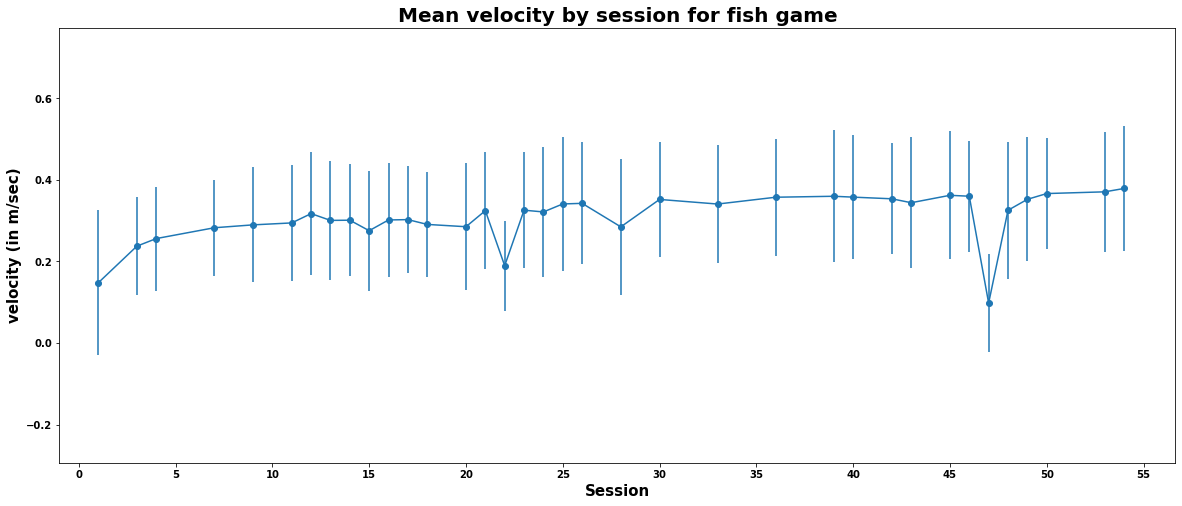

In [83]:
plt.figure(figsize=(20,8))
plt.errorbar(gen_fish['session_nr'],gen_fish['veldb_mean'],gen_fish['veldb_std'], marker='o');

plt.xlabel('Session',fontsize=15)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.xlim(left=-1)
plt.ylabel('velocity (in m/sec)',fontsize=15)
plt.ylim([min_ylim,max_ylim])
plt.title('Mean velocity by session for fish game',fontsize=20)

plt.savefig(main_results_path + '\\Mean_vel_fish.png',bbox_inches = "tight")
plt.show();

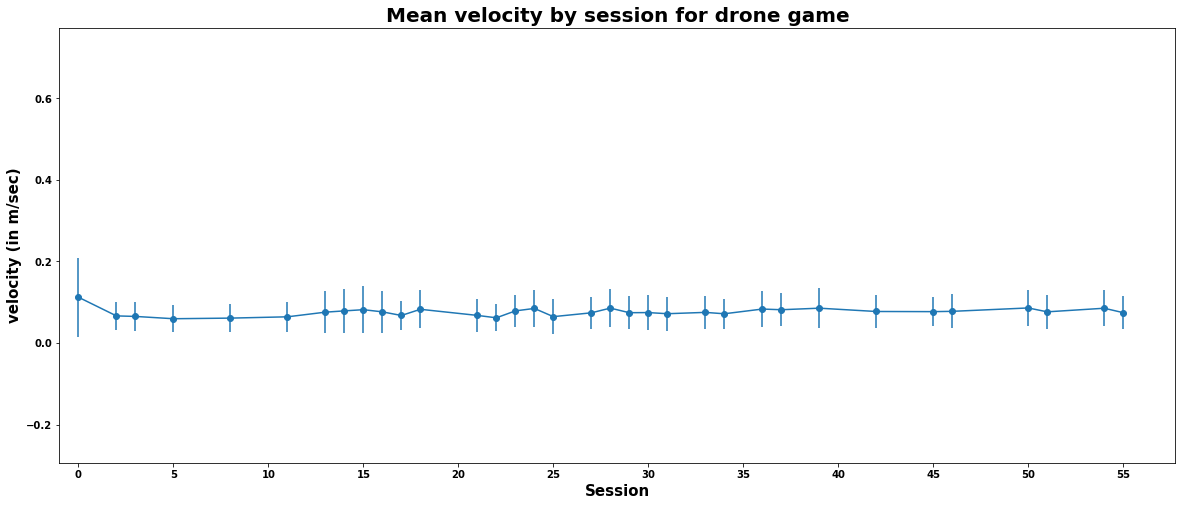

In [84]:
plt.figure(figsize=(20,8))
plt.errorbar(gen_drone['session_nr'],gen_drone['veldb_mean'],gen_drone['veldb_std'], marker='o');

plt.xlabel('Session',fontsize=15)
plt.xlim(left=-1)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.ylabel('velocity (in m/sec)',fontsize=15)
plt.ylim([min_ylim,max_ylim])
plt.title('Mean velocity by session for drone game',fontsize=20)

plt.savefig(main_results_path + '\\Mean_vel_drone.png',bbox_inches = "tight")
plt.show();

In [85]:
# plt.figure(figsize=(20,8))
# plt.bar(gen_explore['session_nr'],gen_explore['vel_mean'])
# plt.xlim(left=0);
# plt.xlabel('Session')
# plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
# plt.ylabel('velocity (in m/sec)')
# plt.ylim([0,max_vel])
# plt.title('Mean velocity by session for explore game')

# plt.savefig(main_results_path + '\\Mean_vel_explore.png',bbox_inches = "tight")
# plt.show();

In [86]:
# plt.figure(figsize=(20,8))
# plt.bar(gen_fish['session_nr'],gen_fish['vel_mean'])
# plt.xlim(left=0);
# plt.xlabel('Session')
# plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
# plt.ylabel('velocity (in m/sec)')
# plt.ylim([0,max_vel])
# plt.title('Mean velocity by session for fish game')

# plt.savefig(main_results_path + '\\Mean_vel_fish.png',bbox_inches = "tight")
# plt.show();

In [87]:
# plt.figure(figsize=(20,8))
# plt.bar(gen_drone['session_nr'],gen_drone['vel_mean'])
# plt.xlim(left=0);
# plt.xlabel('Session')
# plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
# plt.ylabel('velocity (in m/sec)')
# plt.ylim([0,max_vel])
# plt.title('Mean velocity by session for drone game')

# plt.savefig(main_results_path + '\\Mean_vel_drone.png',bbox_inches = "tight")
# plt.show();

##### Plot change in velocity (within session) by session

In [88]:
vel_diff_max = gen_parameters['vel_diff'].max()
vel_diff_min = gen_parameters['vel_diff'].min()

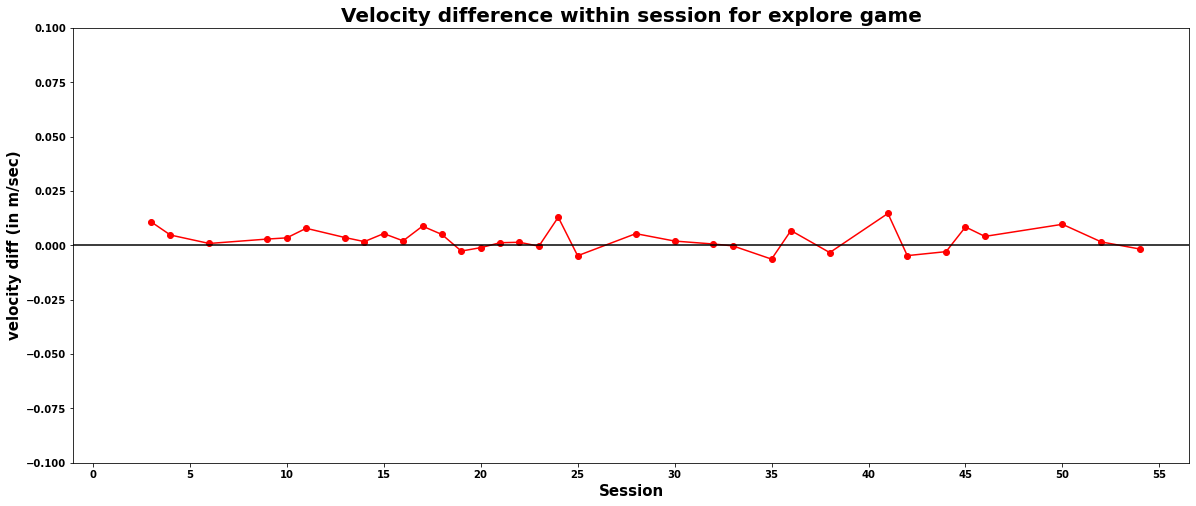

In [89]:
plt.figure(figsize=(20,8))
plt.plot(gen_explore['session_nr'],gen_explore['vel_diff'], marker='o',color='red');
plt.xlabel('Session',fontsize=15)
plt.xlim(left=-1)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.axhline(y=0, color='black',linestyle='-')
plt.ylabel('velocity diff (in m/sec)', fontsize=15)
# plt.ylim([vel_diff_min,vel_diff_max])
plt.ylim([-0.1,0.1])
plt.title('Velocity difference within session for explore game',fontsize=20);

plt.savefig(main_results_path + '\\Vel_diff_explore.png',bbox_inches = "tight")
plt.show();

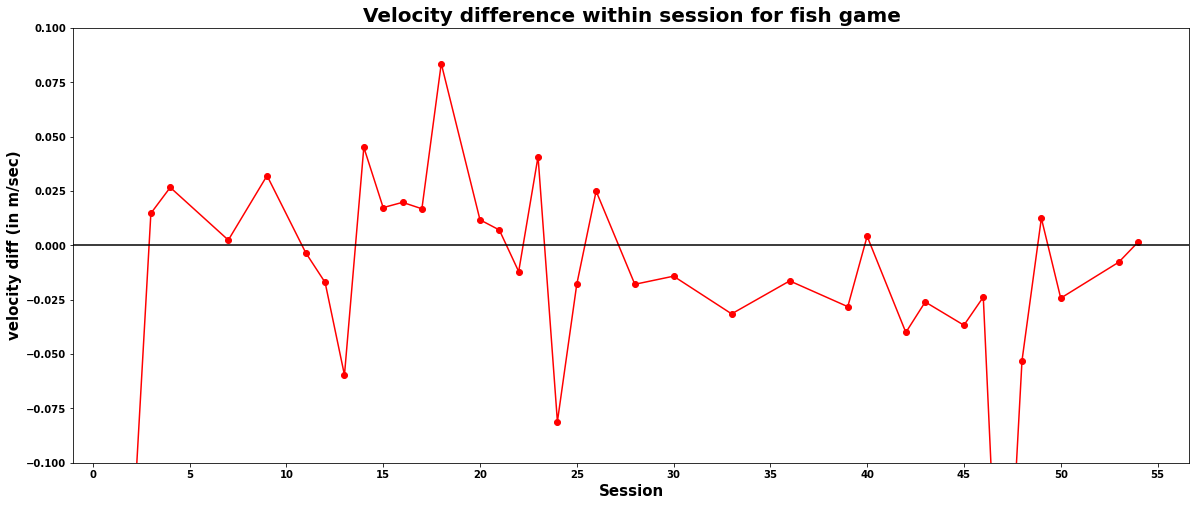

In [90]:
plt.figure(figsize=(20,8))
plt.plot(gen_fish['session_nr'],gen_fish['vel_diff'],marker='o',color='red');

plt.xlabel('Session',fontsize=15)
plt.xlim(left=-1)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.axhline(y=0, color='black',linestyle='-')
plt.ylabel('velocity diff (in m/sec)',fontsize=15)
# plt.ylim([vel_diff_min,vel_diff_max])
plt.ylim([-0.1,0.1])
plt.title('Velocity difference within session for fish game',fontsize=20);

plt.savefig(main_results_path + '\\Vel_diff_fish.png',bbox_inches = "tight")
plt.show();


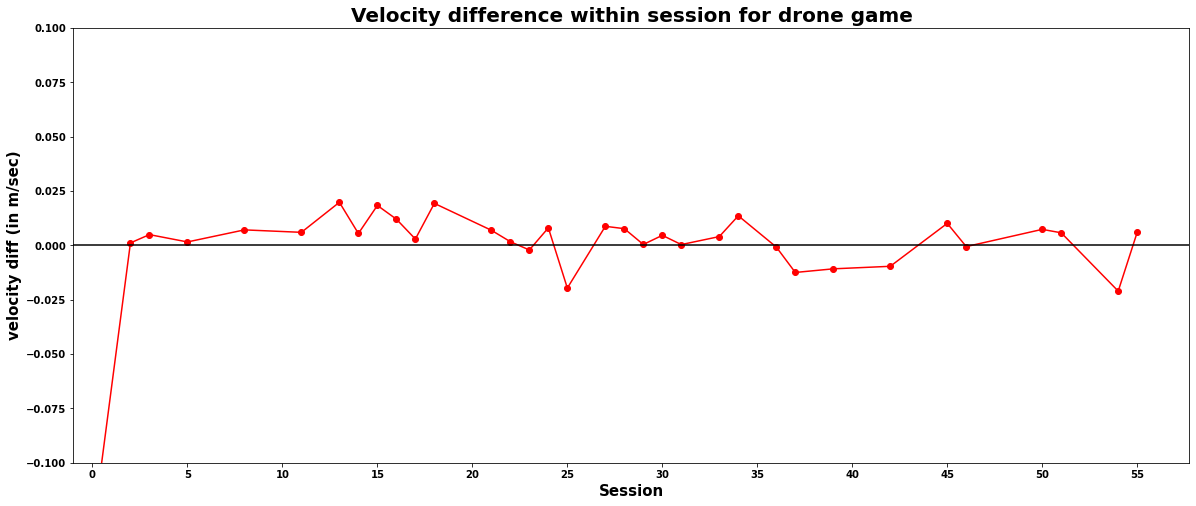

In [91]:
plt.figure(figsize=(20,8))
plt.plot(gen_drone['session_nr'],gen_drone['vel_diff'],marker='o',color='red');

plt.xlabel('Session',fontsize=15)
plt.xlim(left=-1)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.axhline(y=0, color='black',linestyle='-')
plt.ylabel('velocity diff (in m/sec)',fontsize=15)
# plt.ylim([vel_diff_min,vel_diff_max])
plt.ylim([-0.1,0.1])
plt.title('Velocity difference within session for drone game',fontsize=20);

plt.savefig(main_results_path + '\\Vel_diff_drone.png',bbox_inches = "tight")
plt.show();

#### Smoothness (Sparc)
only for explore[GameID=0] and drone[GameID=2] games
<br> Does SPARC stabilize as gameplay progresses?


**WILL DECIDE HOW TO RE-PLOT THIS**

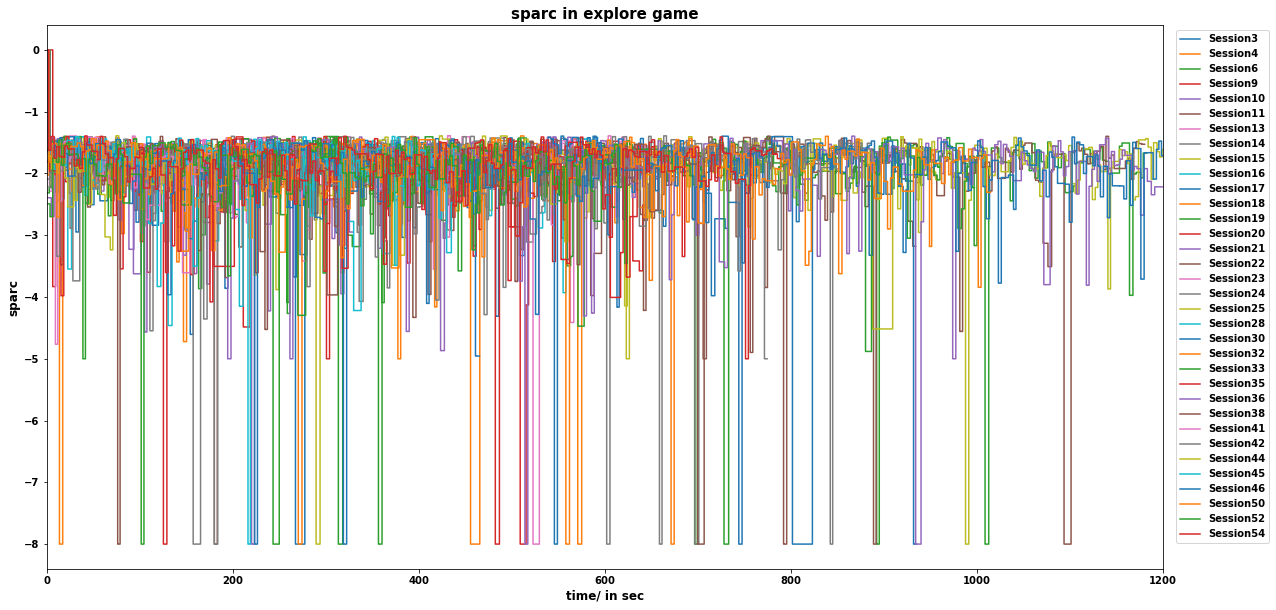

In [92]:
# def run_sessions(df_session):
plt.figure(figsize=(20,10))
labels=[]
for session, df in enumerate(df_session):
    # only plot for explore game
    game=0
    if game in df['GameID'].unique():
        df_game = df[df['GameID']==0]
        df_game['tsec'] = df_game[['TimeStampMS']].diff().cumsum(axis=0)/1000

        plt.step(df_game['tsec'],df_game['Sparc']);
        labels.append(r'Session{}'.format(session))
        
    plt.xlim([0,1200])
    plt.legend(labels, bbox_to_anchor=(1.1,1), loc='upper right')
    plt.xlabel('time/ in sec',fontsize=12)
    plt.ylabel('sparc',fontsize=12)
    plt.title('sparc in explore game',fontsize=15);

In [93]:
# plt.figure(figsize=(20,10))
# labels=[]
# for session, df in enumerate(df_session):
#     # only plot for explore game
#     game=2
#     if game in df['GameID'].unique():
#         df_game = df[df['GameID']==2]
#         df_game['tsec'] = df_game[['TimeStampMS']].diff().cumsum(axis=0)/1000

#         plt.step(df_game['tsec'],df_game['Sparc']);
#         labels.append(r'Session{}'.format(session))

#     plt.xlim([0,700])
#     plt.legend(labels, bbox_to_anchor=(1.1,1), loc='upper right')
#     plt.xlabel('time/ in sec',fontsize=12)
#     plt.ylabel('sparc',fontsize=12)
#     plt.title('sparc in drone game',fontsize=15);

#### Plot coordinates

**declare path for saving fig**
<br> new path/folder declared in this section  again

In [94]:
# declared for plotting and savefig
patientid = df['PatientID'].unique()[0]

**determine between assistive 'A' vs perturbation 'P' modes**
<br> assistance: visual == target
<br> perturbation: visual != target (handle trying to reach visual)

In [95]:
def define_haptics(row):
    if row['TargetXCoord']==row['VisualTargetXCoord']:
        row['haptics']='A'
    else:
        row['haptics']='P'
    return row

In [96]:
def change_Kx(row):
    if row['mode'] == 'P':
        row['KxGain'] *= -1
    return row

In [97]:
def plot_coord(tset):
    '''function to plot coordinates, defined by change in A-P modes'''
    fig = plt.figure(figsize=(20,15))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
       
    ax1.scatter(tset['tsec'],tset['XCoordinate'],s=5,color='red',ls='None',label='X coord');
    if game==0: # only plot TargetX for explore
        ax1.scatter(tset['tsec'],tset['TargetXCoord'],s=20,color='green',ls='None',label='X Target');
#         ax1.scatter(tset['tsec'],tset['VisualTargetXCoord_roll'],s=10,color='orange');

        # plot vertical lines for repeats
        my_labels = {'xcoords': 'repeat'}
        xcoords = np.nan_to_num(tset[tset['VisualTargetXCoord_diff']!=0]['tsec'])
        
        for xc in xcoords:
            ax1.axvline(x=xc,ls='--',label=my_labels['xcoords'])
            my_labels['xcoords']='_nolegend_'
#             if xc in target_visual['tsec'].values:
#                 ax1.text(xc,max(tset['TargetXCoord']),target_visual[target_visual['tsec']==xc]['haptics'].values[0],rotation=90)
    
    ax1.set_xlim(left=0);
    ax1.set_ylabel('x-coord')
#     ax1.legend(['X coord','X Target'],loc='upper right')
    ax1.legend(loc='upper right')
    ax1.set_title('X coordinates');

    ax2.scatter(tset['tsec'],tset['YCoordinate'],s=5,color='blue',label='Y coord');
    if game==0: # only plot TargetX for explore
        ax2.scatter(tset['tsec'],tset['TargetYCoord'],s=20,color='green',label='Y Target');
#         ax2.scatter(tset['tsec'],tset['VisualTargetYCoord_roll'],s=10,color='orange');
        
        my_labels = {'xcoords': 'repeat'}
        for xc in xcoords:
            ax2.axvline(x=xc,ls='--',label=my_labels['xcoords'])
            my_labels['xcoords']='_nolegend_'
#             if xc in target_visual['tsec'].values:
#                 ax2.text(xc,max(tset['TargetYCoord']),target_visual[target_visual['tsec']==xc]['haptics'].values[0],rotation=90)
            
    ax2.set_xlim(left=0);
    ax2.set_ylabel('y-coord')
    ax2.legend(loc='upper right')
    ax2.set_title('Y coordinates');

    plt.suptitle('Player = {}, Plot coordinates: Session nr={}, Game={} '.format(patientid, session, gamename),fontsize=15)
    plt.xlabel('time/ in sec',fontsize=12);

In [98]:
for session, df in enumerate(df_session):
    for game in range(0,df1['GameID'].nunique()):
        if game in df['GameID'].unique():
            df_game = df[df['GameID']==game]
            df_game['tsec'] = df_game[['TimeStampMS']].diff().cumsum(axis=0)/1000
            
            # mode change only for explore game
            if game==0:
                # define vertical lines for change in haptics
                df_game['VisualTargetXCoord_diff'] = df_game['VisualTargetXCoord'].diff()
                
                # assumption is that VisualTarget is delayed by ONE phase, and sessionID has been corrected
                # drop first value of VisualTarget (from previous session?)
                visual1 = df_game[df_game['VisualTargetXCoord_diff']!=0][['VisualTargetXCoord']].iloc[1:,:].reset_index().drop(columns=['index'])
                df_game['TargetXCoord_diff'] = df_game['TargetXCoord'].diff()
                # drop last value of Target
                target1 = df_game[df_game['TargetXCoord_diff']!=0][['tsec','TargetXCoord']][:-1].reset_index().drop(columns=['index'])
                # merge and compare both values to determine mode
                target_visual = pd.merge(target1,visual1,left_index=True, right_index=True).fillna(0)
                target_visual = target_visual.apply(define_haptics,axis=1)
            
            # label plots
            if game==0:
                gamename='explore'
            elif game==1:
                gamename='fish'
            elif game==2:
                gamename='drone'
                                      
#             plot_coord(df_game)
            
#             # save fig
#             # note this will overwrite previously saved fig 
#             results_path = os.path.join('data', 'results', patientid, 'coord')
#             if not os.path.exists(results_path):
#                 os.makedirs(results_path)
#             plt.savefig(results_path + '\\fig{}-{}.png'.format(session,gamename))
#             plt.show()

#### Plot K_xx and Force

In [99]:
def plot_k_force(tset):
    '''function to plot stiffness Kx and forces calculated, only for explore game'''
    # only plot for explore game
    fig = plt.figure(figsize=(20,15))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    
    ## plot K
    ax1.scatter(tset['tsec'],tset['KxGain'],s=5,color='blue',label='K_xx');
    # only calculate/plot for explore game
    if game==0: 
        # plot vertical lines for repeats
        my_labels = {'xcoords': 'repeat'}
        xcoords = np.nan_to_num(tset[tset['VisualTargetXCoord_diff']!=0]['tsec'])
        
        for xc in xcoords:
            ax1.axvline(x=xc,ls='--',label=my_labels['xcoords'])
            my_labels['xcoords']='_nolegend_'
#             if xc in target_visual['tsec'].values:
#                 ax1.text(xc,max(tset['KxGain']),target_visual[target_visual['tsec']==xc]['haptics'].values[0],rotation=90)
                
    ax1.set_xlim(left=0);
    ax1.set_ylabel('K_xx')
    ax1.legend(loc='upper right')
    ax1.set_title('K_xx');

    ## plot forces
    ax2.axhline(y=21, color='green', linestyle='--',label='F_max')
    ax2.scatter(tset['tsec'],tset['TotalForce'],s=6,color='red',label='F_total');
#     ax2.scatter(tset['tsec'],tset['F_spring'],s=3,color='cyan',label='F_spring');
    ax2.scatter(tset['tsec'],tset['F_sens'],s=3,color='black',label='F_sens');
    
    if game==0: # only plot for explore
        # plot vertical lines for repeats
        my_labels = {'xcoords': 'repeat'}

        for xc in xcoords:
            ax2.axvline(x=xc,ls='--',label=my_labels['xcoords'])
            my_labels['xcoords']='_nolegend_'
#             if xc in target_visual['tsec'].values:
#                 ax2.text(xc,max(tset['F_spring']),target_visual[target_visual['tsec']==xc]['haptics'].values[0],rotation=90)
            
    ax2.set_xlim(left=0);
    ax2.set_ylabel('Force/N')
    ax2.legend(loc='upper right')
    ax2.set_title('Total Force');
    
    plt.suptitle('Player = {}, Plot K_xx and Forces: Session nr={}, Game=explore'.format(patientid, session),fontsize=15)
    plt.xlabel('time/ in sec',fontsize=12);

In [100]:
# parameters to calculate F_sens, determined by current passing thru motors
rp = 0.016    # radius of pulley
J_p_th = np.array([[rp/2,rp/2],[rp/2,-rp/2]])   # jacobian matrix
J_p_th = np.transpose(J_p_th)

session_nr = []
game_nr = []
F_deficit_mean = []
F_deficit_std = []
F_sens_mean = []
F_sens_std = []
Fsens_21 =[]
Ftot_21 = []
Fspring_21 = []
kx_mean = []
kx_std = []
Kx_r_q3 = []
Kx_range = []
Kx_Atime = []
Kx_Ptime = []
help_mode = []
haptics_rho = []
haptics_pvalue = []
repeatn = []

for session, df in enumerate(df_session):
    # only calculate for explore game
    game=0
    if game in df['GameID'].unique():
        df_game = df[df['GameID']==0]
        df_game['tsec'] = df_game[['TimeStampMS']].diff().cumsum(axis=0)/1000
        df_game['TimeStampMS_diff'] = df_game['TimeStampMS'].diff()
        
        ## Kx      
        # moving median is more robust, since it recovers the underlying trend of the discrete Kx
        # taken into account only +ve values
        Kx_r_pos = df_game['KxGain'].rolling(1000).median()
        
        ## calculate F_spring
        # distance to target
        df_game['dist_targ'] = np.sqrt((df_game['TargetXCoord'] - df_game['XCoordinate'])**2 + (df_game['TargetYCoord'] - df_game['YCoordinate'])**2)
        df_game['F_spring'] = df_game['KxGain']*df_game['dist_targ']
        
        ## define A-P mode 
        # define vertical lines for change in haptics
        df_game['VisualTargetXCoord_diff'] = df_game['VisualTargetXCoord'].diff()
     
        # assumption is that VisualTarget is delayed by ONE phase, and sessionID has been corrected
        # drop first value of VisualTarget (from previous session?)
        visual1 = df_game[df_game['VisualTargetXCoord_diff']!=0][['VisualTargetXCoord']].iloc[1:,:].reset_index().drop(columns=['index'])
        df_game['TargetXCoord_diff'] = df_game['TargetXCoord'].diff()
        # drop last value of Target
        target1 = df_game[df_game['TargetXCoord_diff']!=0][['tsec','TargetXCoord']][:-1].reset_index().drop(columns=['index'])
        # merge and compare both values to determine mode
        target_visual = pd.merge(target1,visual1,left_index=True, right_index=True).fillna(0)
        target_visual = target_visual.apply(define_haptics,axis=1)

        # assumption is that mode change starts exactly on defined tsec 
        # no info on last haptic, since VisualTarget unknown within same session
        df_game['mode'] = np.nan
        for start, time in enumerate(target_visual['tsec']):
            if start != (target_visual['tsec'].size-1):
                df_game['mode'].loc[(df_game['tsec']>=target_visual['tsec'][start]) & (df_game['tsec']<target_visual['tsec'][start+1])] = target_visual['haptics'].iloc[start]
#             else:
#                 # define haptics till end
#                 # note last haptic not defined 
#                 df_game['mode'].loc[(df_game['tsec']>=target_visual['tsec'][start]) & (df_game['tsec']<df_game['tsec'].iloc[-1])] = target_visual['haptics'].iloc[start]
        
        ## Kx
        # negate Kx if in P mode
        df_game = df_game.apply(change_Kx,axis=1)
        
        # moving median taken into account -ve values
        Kx_r_neg = df_game['KxGain'].rolling(1000).median()
        
        ## detect help_mode, change in gradient
        target_visual['gradient'] = np.nan
        for start, time in enumerate(target_visual['tsec']):
            if start != (target_visual['tsec'].size-1):
                target_visual['gradient'].iloc[start] = df_game[(df_game['tsec']>=target_visual['tsec'][start]) & (df_game['tsec']<target_visual['tsec'][start+1])][['KxGain']].agg(np.ptp).values[0]
            else:
                last_repeattime = df_game[df_game['TargetXCoord_diff']!=0][['tsec','TargetXCoord']].iloc[-1].values[0]
                target_visual['gradient'].iloc[start] = df_game[(df_game['tsec']>=target_visual['tsec'][start]) & (df_game['tsec']<last_repeattime)][['KxGain']].agg(np.ptp).values[0]
        
        ## define forces
        df_game['tau_a_left'] = 0.0398*df_game['CurrentSenseLeft']
        df_game['tau_a_right'] = 0.0398*df_game['CurrentSenseRight']
        
        # calculate F_sens
        F_sens = []
        for i in range(0,len(df_game['tau_a_left'])):
            # matlab's equivalent in the least squares sense to the under- or overdetermined system of equations AX = B
            mat = np.linalg.lstsq(J_p_th , np.array([df_game['tau_a_left'].iloc[i], df_game['tau_a_right'].iloc[i] 
                                                    ]).reshape(2,1))[0]
            mat_norm = np.linalg.norm(mat,1)
            F_sens.append(mat_norm)
        df_game['F_sens'] = F_sens
        df_game['F_deficit'] = df_game['F_sens']/df_game['TotalForce']
        
        # determine correlation between F_sens and KxGain
        rho, p = scipy.stats.spearmanr(df_game['F_sens'].rolling(1000).median().dropna(),df_game['KxGain'].rolling(1000).median().dropna())
        
        ## put in df
        ## Forces
        # calculate required mertrics from forces
        session_nr.append(session)
        game_nr.append(game)
        F_deficit_mean.append(df_game['F_deficit'].replace(np.inf,np.nan).dropna().mean())
        F_deficit_std.append(df_game['F_deficit'].replace(np.inf,np.nan).dropna().std())
        F_sens_mean.append(df_game['F_sens'].mean())
        F_sens_std.append(df_game['F_sens'].std())
        # convert to sec, convert to percentage
        Ftot_21.append((df_game[df_game['TotalForce']>21][['TimeStampMS_diff']].sum().values[0]/1000)/(df_game['tsec'].iloc[-1])*100)
        Fsens_21.append((df_game[df_game['F_sens']>21][['TimeStampMS_diff']].sum().values[0]/1000)/(df_game['tsec'].iloc[-1])*100)
        Fspring_21.append((df_game[df_game['F_spring']>21][['TimeStampMS_diff']].sum().values[0]/1000)/(df_game['tsec'].iloc[-1])*100)
        help_mode.append(target_visual[(target_visual['gradient']!=0) & (abs(target_visual['gradient'])>=100)][['gradient']].count().values[0])
        haptics_rho.append(rho)
        haptics_pvalue.append(p)
        
        # put in F_parameters df
        F_parameters = []
        for row in range(0,len(session_nr)):
            F_parameters.append(row)
        F_parameters = pd.DataFrame(F_parameters,columns=['session_nr'])   
        F_parameters['session_nr'] = session_nr
        F_parameters['game_nr'] = game_nr
        F_parameters['F_deficit_mean'] = F_deficit_mean
        F_parameters['F_deficit_std'] = F_deficit_std
        F_parameters['F_sens_mean'] = F_sens_mean
        F_parameters['F_sens_std'] = F_sens_std
        F_parameters['Ftot_21'] = Ftot_21
        F_parameters['Fsens_21'] = Fsens_21
        F_parameters['Fspring_21'] = Fspring_21
        F_parameters['help_mode'] = help_mode
        F_parameters['haptics_rho'] = haptics_rho 
        F_parameters['haptics_pvalue'] = haptics_pvalue 
        
        ## Kx
        # calculate required metrics from Kx
#         session_nr.append(session)
#         game_nr.append(game)
        Kx_r_q3.append(np.array_split(Kx_r_neg,4)[3].median())    # Kx median at last quadrant
        kx_mean.append(df_game[['KxGain']].mean().values[0])   # Kx mean (inc neg values) in session
        kx_std.append(df_game[['KxGain']].std().values[0])
        Kx_range.append(Kx_r_pos.max()-Kx_r_pos.min())   # Kx range in session
        Kx_Atime.append(df_game[df_game['mode']=='A'][['TimeStampMS_diff']].sum().values[0]/1000)   
        Kx_Ptime.append(df_game[df_game['mode']=='P'][['TimeStampMS_diff']].sum().values[0]/1000)
        repeatn.append(df_game[df_game['TargetXCoord_diff']!=0][['TargetXCoord']].count().values[0])
        
        # put in Kx_parameters df
        Kx_parameters = []
        for row in range(0,len(session_nr)):
            Kx_parameters.append(row)
        Kx_parameters = pd.DataFrame(Kx_parameters,columns=['session_nr'])   
        Kx_parameters['session_nr'] = session_nr
        Kx_parameters['game_nr'] = game_nr
        Kx_parameters['Kx_r_q3'] = Kx_r_q3
        Kx_parameters['kx_mean'] = kx_mean
        Kx_parameters['kx_std'] = kx_std
        Kx_parameters['Kx_range'] = Kx_range            
        Kx_parameters['Kx_Atime'] = Kx_Atime
        Kx_parameters['Kx_Ptime'] = Kx_Ptime
        Kx_parameters['repeatn'] = repeatn
        
#         # plot
#         plot_k_force(df_game)
        
#         # save fig
#         # note this will overwrite previously saved fig 
#         results_path = os.path.join('data', 'results', patientid, 'stiffness_force')
#         if not os.path.exists(results_path):
#             os.makedirs(results_path)
#         plt.savefig(results_path + '\\fig{}-explore.png'.format(session))
#         plt.show()

#### Special condition: F_sens=0

#### Kxx parameters

In [101]:
# Kx_parameters

In [102]:
Kx_parameters['total_time'] = Kx_parameters['Kx_Atime'] + Kx_parameters['Kx_Ptime']
Kx_parameters['A_fractiontime'] = Kx_parameters['Kx_Atime']/Kx_parameters['total_time']
Kx_parameters['P_fractiontime'] = Kx_parameters['Kx_Ptime']/Kx_parameters['total_time']
Kx_parameters.rename(columns={'A_fractiontime': 'in A mode',
                    'P_fractiontime': 'in P mode'}, inplace=True)
Kx_parameters = Kx_parameters.set_index(['session_nr'])

In [103]:
A_fractiontime = Kx_parameters['in A mode'].mean()
P_fractiontime = Kx_parameters['in P mode'].mean()
print(f'Player{patientid} spent a mean fraction of {A_fractiontime:.3f} in assistive mode and {P_fractiontime:.3f} in perturbed mode')

Player006 spent a mean fraction of 0.138 in assistive mode and 0.862 in perturbed mode


In [104]:
# split data to quadrants
# time spent in assistive mode in first/last quadrant
A_time_q0 = np.array_split(Kx_parameters['in A mode'],4)[0].mean()
A_time_q3 = np.array_split(Kx_parameters['in A mode'],4)[3].mean()

# time spent in perturbed mode in first/last quadrant
P_time_q0 = np.array_split(Kx_parameters['in P mode'],4)[0].mean()
P_time_q3 = np.array_split(Kx_parameters['in P mode'],4)[3].mean()

print(f'Player{patientid} spent in first quadrant, a mean fraction time of {A_time_q0:.3f} in assistive mode and {P_time_q0:.3f} in perturbed mode')
print(f'Player{patientid} spent in last quadrant, a mean fraction time of {A_time_q3:.3f} in assistive mode and {P_time_q3:.3f} in perturbed mode')
print(f'So from first to last quadrant, player{patientid} has a difference mean fraction time of {(A_time_q3-A_time_q0):.3f} in assistive mode and {(P_time_q3-P_time_q0):.3f} in perturbed mode')

Player006 spent in first quadrant, a mean fraction time of 0.184 in assistive mode and 0.816 in perturbed mode
Player006 spent in last quadrant, a mean fraction time of 0.086 in assistive mode and 0.914 in perturbed mode
So from first to last quadrant, player006 has a difference mean fraction time of -0.098 in assistive mode and 0.098 in perturbed mode


In [105]:
# save to outputs file
with open(main_results_path + '\\outputs.txt', mode='a') as file_:
    file_.write(f'Player{patientid} spent a mean fraction of {A_fractiontime:.3f} in assistive mode and {P_fractiontime:.3f} in perturbed mode')
    file_.write("\n")  # Next line.
    file_.write(f'Player{patientid} spent in first quadrant, a mean fraction time of {A_time_q0:.3f} in assistive mode and {P_time_q0:.3f} in perturbed mode')
    file_.write("\n")  # Next line.
    file_.write(f'Player{patientid} spent in last quadrant, a mean fraction time of {A_time_q3:.3f} in assistive mode and {P_time_q3:.3f} in perturbed mode')
    file_.write("\n")  # Next line.
    file_.write(f'So from first to last quadrant, player{patientid} has a difference mean fraction time of {(A_time_q3-A_time_q0):.3f} in assistive mode and {(P_time_q3-P_time_q0):.3f} in perturbed mode')
    file_.write("\n")  # Next line.

##### Plot fraction of time spent in A-P modes

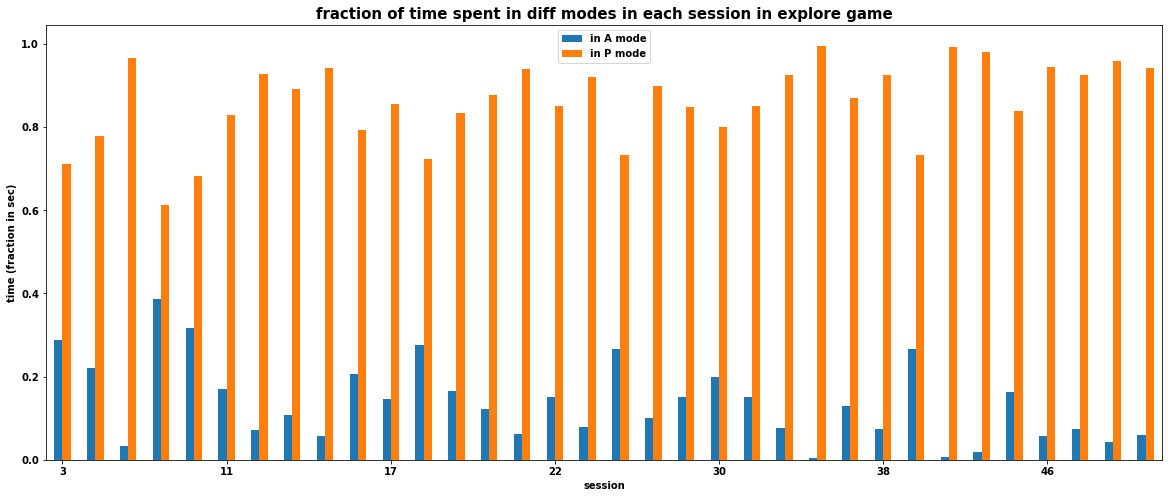

In [106]:
# plt.figure(figsize=(20,8))
# plt.bar(Kx_parameters['session_nr'],Kx_parameters['in A mode'],Kx_parameters['in P mode'])
Kx_parameters.drop(columns=['game_nr','Kx_Atime','Kx_Ptime','total_time','kx_mean','kx_std','Kx_range','Kx_r_q3','repeatn']).plot.bar(figsize=(20,8))
plt.xlabel('session')
plt.xticks(rotation=0)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.ylabel('time (fraction in sec)');
plt.title('fraction of time spent in diff modes in each session in explore game',fontsize=15);

plt.savefig(main_results_path + '\\fraction_time_modes.png',bbox_inches = "tight")
plt.show();

In [107]:
##### Plot dispersion of stiffness values

In [108]:
# Kx_parameters.drop(columns=['game_nr','Kx_Atime','Kx_Ptime','total_time','Kx_range','in A mode','in P mode']).plot.bar(figsize=(20,8))
# plt.xlabel('session')
# plt.xticks(rotation=0)
# plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
# plt.ylabel('oscillation');
# plt.title('dispersion of stiffness values in each session',fontsize=15);

# plt.savefig(main_results_path + '\\Kx_std_dev.png',bbox_inches = "tight")
# plt.show();

##### Plot range of stiffness values

In [110]:
Kx_parameters.reset_index(inplace=True)

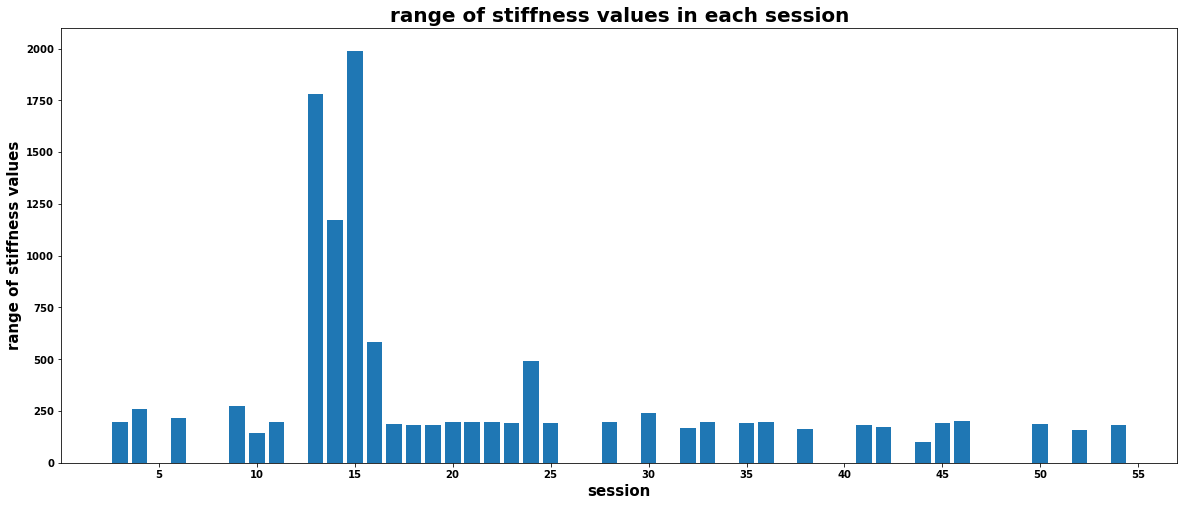

In [111]:
plt.figure(figsize=(20,8))
plt.bar(Kx_parameters['session_nr'],Kx_parameters['Kx_range'])
# Kx_parameters.drop(columns=['game_nr','Kx_Atime','Kx_Ptime','total_time','kx_mean','kx_std','in A mode','in P mode','Kx_r_q3']).plot.bar(figsize=(20,8))
plt.xlabel('session',fontsize=15)
plt.xticks(rotation=0)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.ylabel('range of stiffness values',fontsize=15);
plt.ylim(top=2100)
plt.title('range of stiffness values in each session',fontsize=20);

plt.savefig(main_results_path + '\\Kx_range.png',bbox_inches = "tight")
plt.show();

In [ ]:
##### Plot range and dispersion of stiffness values

In [ ]:
# Kx_parameters.reset_index(inplace=True)
# fig,ax=plt.subplots(figsize=(20,8))
# ax.plot(Kx_parameters['session_nr'],Kx_parameters['Kx_std'],color='red',marker='o')
# ax.set_xlabel('session')
# ax.set_ylabel('oscillation')
# plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))

# ax2=ax.twinx()
# ax2.plot(Kx_parameters['session_nr'],Kx_parameters['Kx_range'],color='blue',marker='^')
# ax2.set_ylabel('range of stiffness values')
# plt.title('range and std of stiffness values in each session',fontsize=15);
# plt.show();

##### Plot mean Kx stiffness coeff

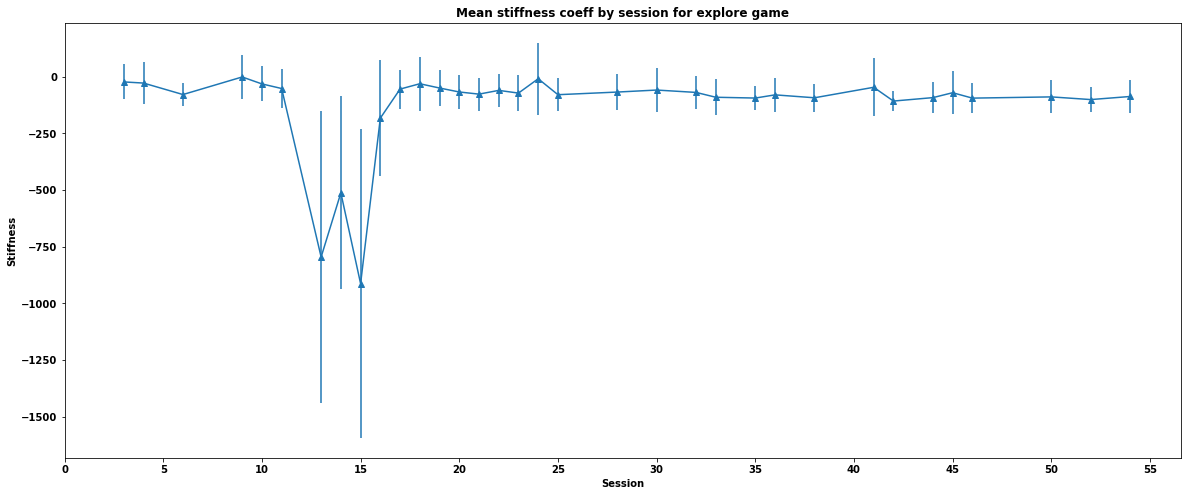

In [112]:
plt.figure(figsize=(20,8))
plt.errorbar(Kx_parameters['session_nr'],Kx_parameters['kx_mean'],Kx_parameters['kx_std'], marker='^')
plt.xlim(left=0);
plt.xlabel('Session')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.ylabel('Stiffness')
plt.title('Mean stiffness coeff by session for explore game')

plt.savefig(main_results_path + '\\Kx_explore.png',bbox_inches = "tight")
plt.show();

##### Plot median of last quadrant of stiffness values

In [113]:
# Kx_parameters.drop(columns=['game_nr','Kx_Atime','Kx_Ptime','total_time','Kx_range','Kx_std','in A mode','in P mode']).plot.bar(figsize=(20,8))
# plt.xlabel('session')
# plt.xticks(rotation=0)
# plt.xlim(left=5)
# plt.ylim([-300,300])
# plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
# plt.ylabel('Median value of stiffness values in last quadrant');
# plt.title('Median value of stiffness values in last quadrant in each session',fontsize=15);

# plt.savefig(main_results_path + '\\Kx_median_lastquad.png',bbox_inches = "tight")
# plt.show();

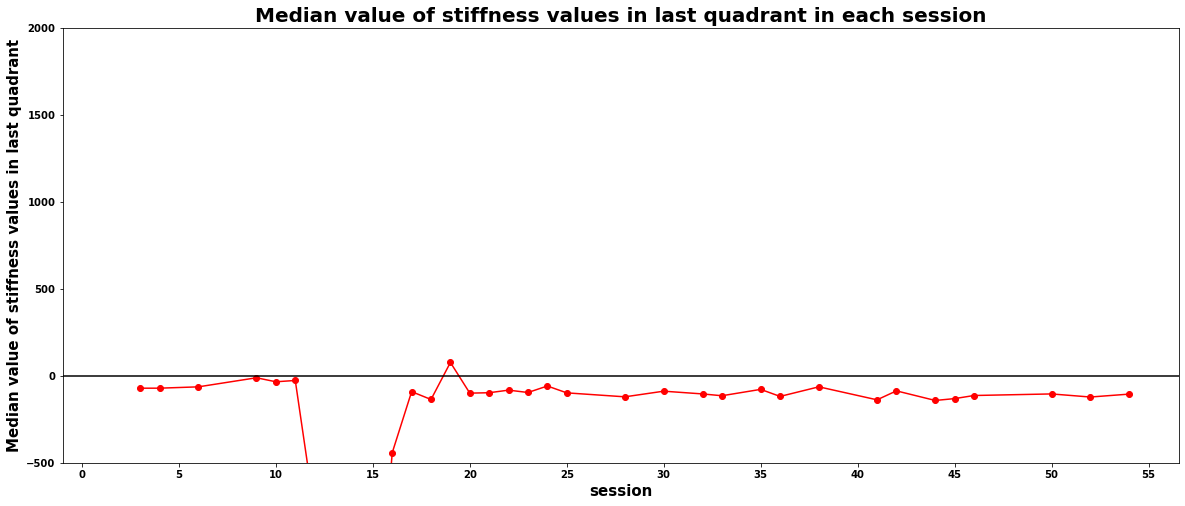

In [114]:
plt.figure(figsize=(20,8))
plt.plot(Kx_parameters['session_nr'],Kx_parameters['Kx_r_q3'],color='red',marker='o')
plt.xlabel('session',fontsize=15)
plt.xticks(rotation=0)
plt.xlim(left=-1)
plt.ylim([-500,2000])
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.axhline(y=0, color='black', linestyle='-')
plt.ylabel('Median value of stiffness values in last quadrant',fontsize=15);
plt.title('Median value of stiffness values in last quadrant in each session',fontsize=20);

plt.savefig(main_results_path + '\\Kx_median_lastquad.png',bbox_inches = "tight")
plt.show();

#### Mean/std of Force parameters

In [115]:
# F_parameters

##### Plot Force deficit (ratio)

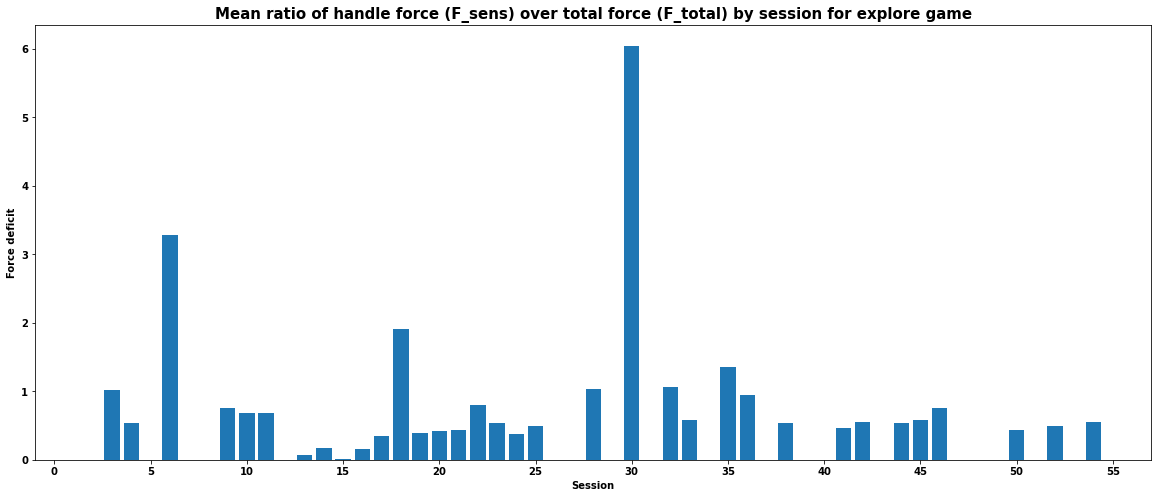

In [116]:
plt.figure(figsize=(20,8))
# plt.errorbar(F_parameters['session_nr'],F_parameters['F_deficit_mean'],F_parameters['F_deficit_std'], marker='^');
plt.bar(F_parameters['session_nr'],F_parameters['F_deficit_mean'])
plt.xlabel('Session')
# plt.ylim(top=1)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.xlim(left=-1)
plt.ylabel('Force deficit')

plt.title('Mean ratio of handle force (F_sens) over total force (F_total) by session for explore game',fontsize=15);

plt.savefig(main_results_path + '\\force_deficit_explore.png',bbox_inches = "tight")
plt.show();

##### Plot percentage of time where F_total>maximum force (21N)

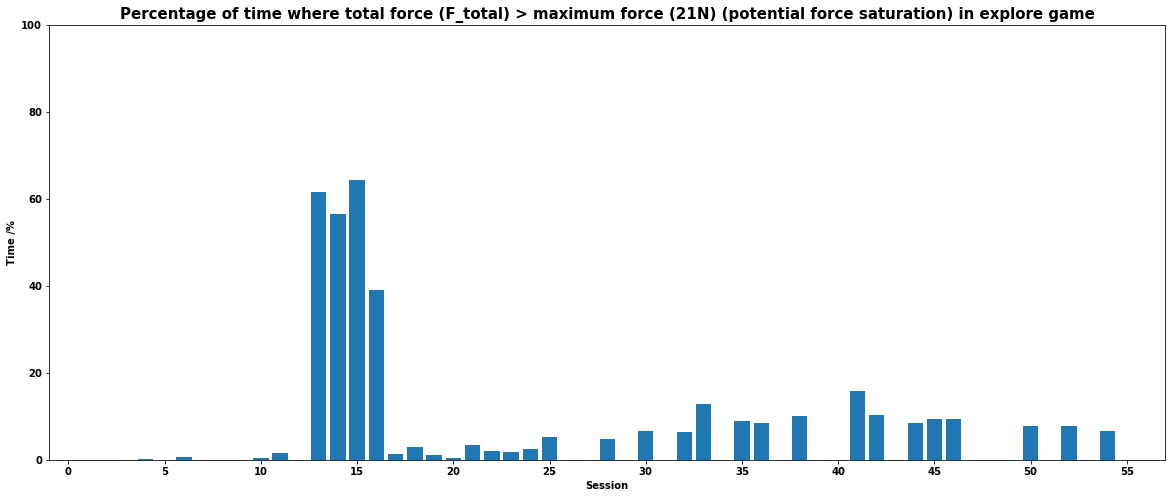

In [117]:
plt.figure(figsize=(20,8))
plt.bar(F_parameters['session_nr'],F_parameters['Ftot_21']);
plt.xlim(left=-1);
plt.xlabel('Session')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.ylim(top=100);
plt.ylabel('Time /%')

plt.title('Percentage of time where total force (F_total) > maximum force (21N) (potential force saturation) in explore game',fontsize=15);

plt.savefig(main_results_path + '\\forcetotal_larger21.png', bbox_inches = "tight")
plt.show();

##### Plot percentage of time where F_sens>maximum force (21N)

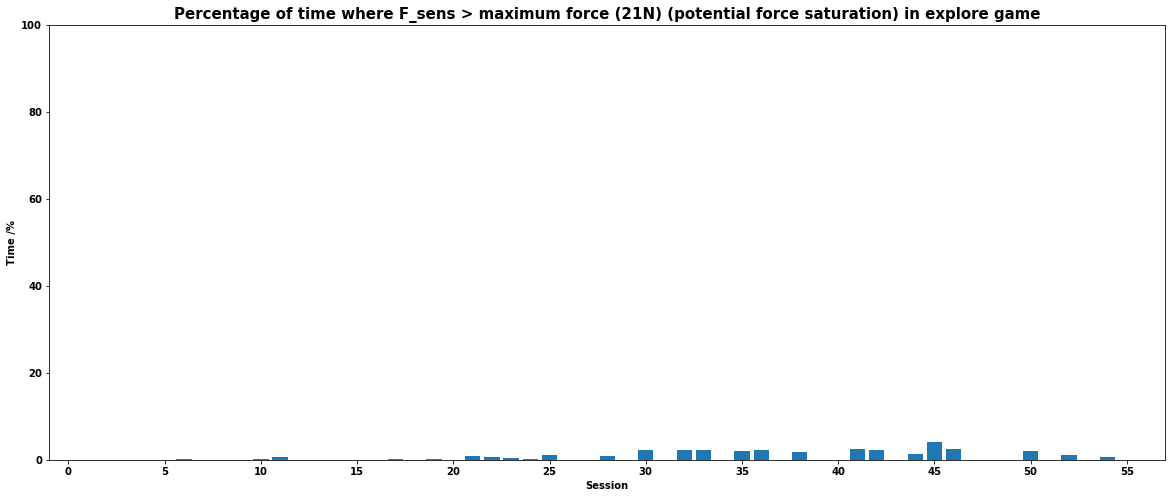

In [118]:
plt.figure(figsize=(20,8))
plt.bar(F_parameters['session_nr'],F_parameters['Fsens_21']);
plt.xlim(left=-1);
plt.xlabel('Session')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.ylim(top=100);
plt.ylabel('Time /%')

plt.title('Percentage of time where F_sens > maximum force (21N) (potential force saturation) in explore game',fontsize=15);

plt.savefig(main_results_path + '\\forcesens_larger21.png', bbox_inches = "tight")
plt.show();

##### Plot percentage of time where F_spring>maximum force (21N)

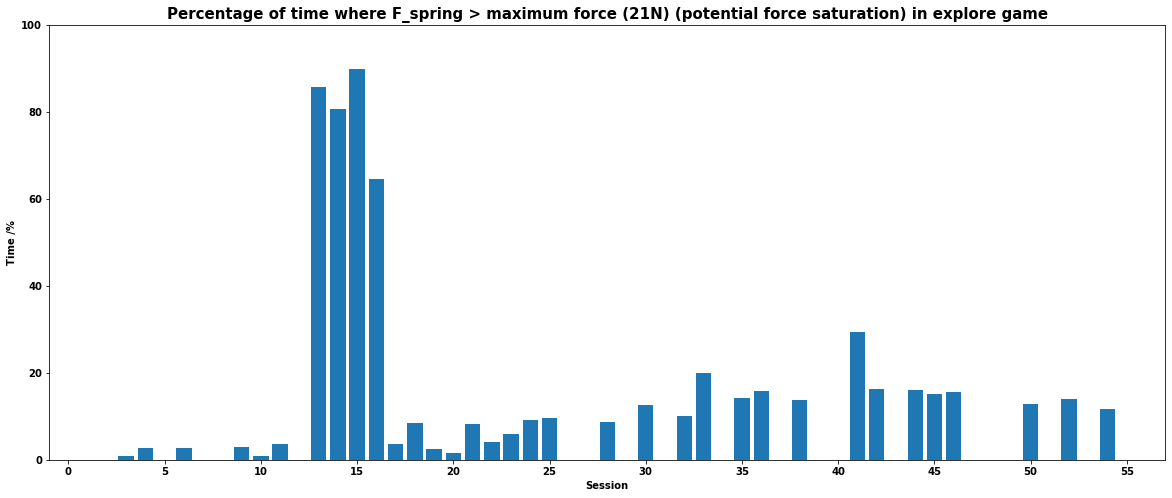

In [119]:
plt.figure(figsize=(20,8))
plt.bar(F_parameters['session_nr'],F_parameters['Fspring_21']);
plt.xlim(left=-1);
plt.xlabel('Session')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.ylim(top=100);
plt.ylabel('Time /%')

plt.title('Percentage of time where F_spring > maximum force (21N) (potential force saturation) in explore game',fontsize=15);

plt.savefig(main_results_path + '\\forcespring_larger21.png', bbox_inches = "tight")
plt.show();

##### Nr of help modes

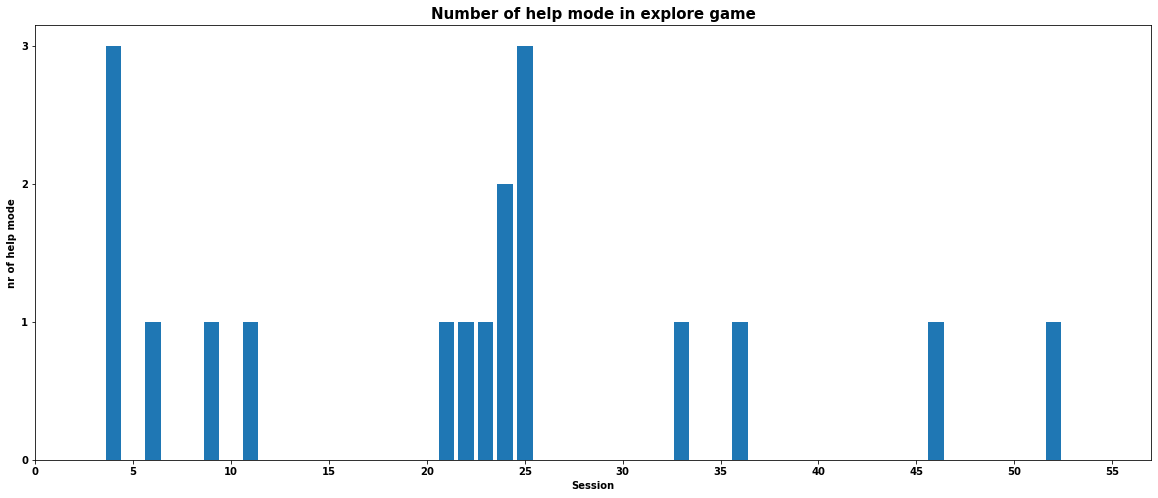

In [120]:
plt.figure(figsize=(20,8))
plt.bar(F_parameters['session_nr'],F_parameters['help_mode']);
plt.xlim(left=0);
plt.xlabel('Session')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.ylabel('nr of help mode')
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Number of help mode in explore game',fontsize=15);

plt.savefig(main_results_path + '\\help_mode_nr.png', bbox_inches = "tight")
plt.show();

#### merge dfs related to explore game

In [121]:
# combined df only of explore game
# as parameters calculated are of explore game
# gen_explore
# Kx_parameters
# F_parameters
df_combined = reduce(lambda x,y: pd.merge(x,y, on='session_nr', how='outer'), [gen_explore, Kx_parameters, F_parameters])
df_combined.drop(columns=['game_nr_x','game_nr_y'],inplace=True)

In [122]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   session_nr      34 non-null     int64  
 1   sparc_mean      34 non-null     float64
 2   sparc_std       34 non-null     float64
 3   Ftot_mean       34 non-null     float64
 4   Ftot_std        34 non-null     float64
 5   vel_mean        34 non-null     float64
 6   veldb_mean      34 non-null     float64
 7   veldb_std       34 non-null     float64
 8   vel_diff        34 non-null     float64
 9   Kx_r_q3         34 non-null     float64
 10  kx_mean         34 non-null     float64
 11  kx_std          34 non-null     float64
 12  Kx_range        34 non-null     float64
 13  Kx_Atime        34 non-null     float64
 14  Kx_Ptime        34 non-null     float64
 15  repeatn         34 non-null     int64  
 16  total_time      34 non-null     float64
 17  in A mode       34 non-null     float

##### Correlation between number of help modes and SPARC

In [123]:
df_corr_helpmode = df_combined.groupby(['help_mode']).mean().reset_index()
df_corr_helpmode

,help_mode,session_nr,sparc_mean,sparc_std,Ftot_mean,Ftot_std,vel_mean,veldb_mean,veldb_std,vel_diff,...,game_nr,F_deficit_mean,F_deficit_std,F_sens_mean,F_sens_std,Ftot_21,Fsens_21,Fspring_21,haptics_rho,haptics_pvalue
0,0,27.809524,-1.896140,0.569302,23.323987,17.826499,0.058616,0.064906,0.086793,0.002816,...,0.0,0.873061,12.511855,4.345043,4.484525,15.356285,1.069697,23.785686,-0.796989,7.510198e-36
1,1,25.900000,-1.952030,0.709404,9.766683,6.756475,0.057290,0.064634,0.085335,0.002617,...,0.0,0.928314,17.986680,4.726586,5.294724,4.812711,1.062950,9.298196,-0.837204,0.000000e+00
2,2,24.000000,-1.970645,1.082711,7.745314,7.386611,0.051708,0.058238,0.083820,0.012941,...,0.0,0.377118,0.963687,3.003771,4.222979,2.517989,0.121324,9.080455,-0.601960,0.000000e+00
3,3,14.500000,-1.958923,0.812478,8.215268,6.142785,0.054052,0.061631,0.080377,-0.000010,...,0.0,0.520427,1.535377,3.587847,4.345846,2.694093,0.523975,6.130443,-0.809521,0.000000e+00


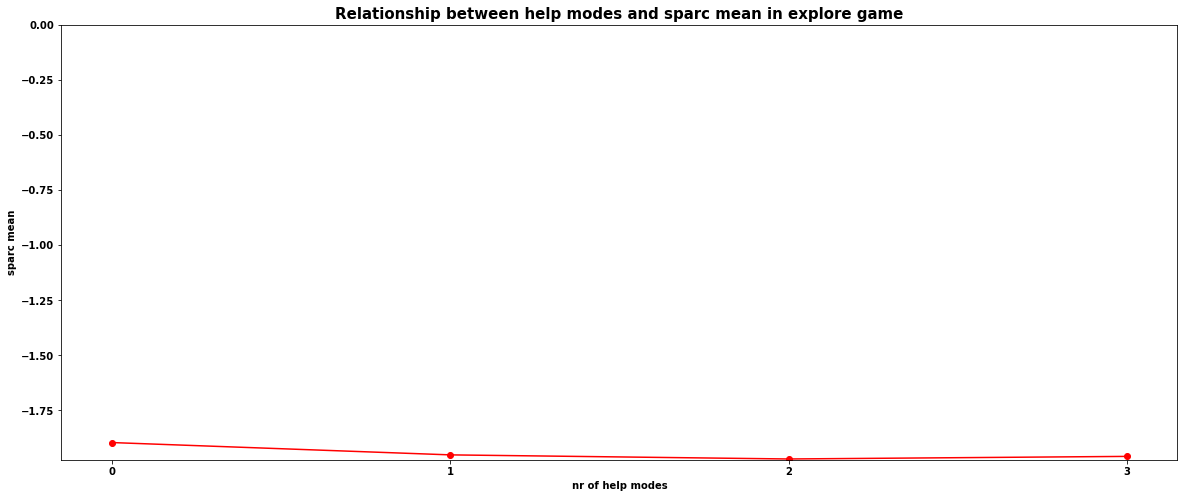

In [124]:
plt.figure(figsize=(20,8))
plt.plot(df_corr_helpmode['help_mode'],df_corr_helpmode['sparc_mean'],color='red',marker='o')
plt.xlabel('nr of help modes')
plt.xticks(rotation=0)
# plt.xlim(left=5)
# plt.ylim([-300,300])
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylabel('sparc mean');
plt.ylim(top=0)
plt.title('Relationship between help modes and sparc mean in explore game',fontsize=15);

plt.savefig(main_results_path + '\\helpmode_sparc.png',bbox_inches = "tight")
plt.show();

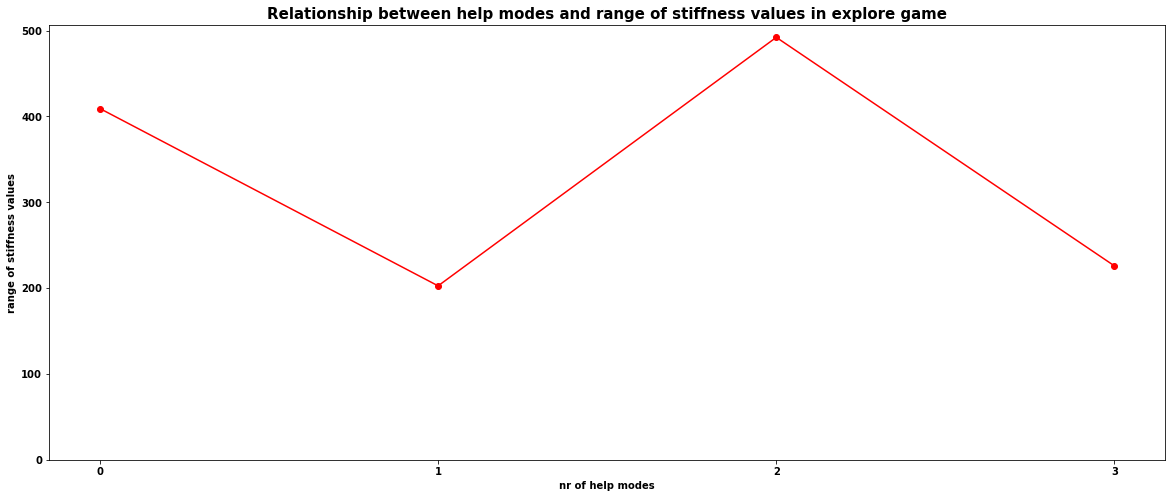

In [125]:
plt.figure(figsize=(20,8))
plt.plot(df_corr_helpmode['help_mode'],df_corr_helpmode['Kx_range'],color='red',marker='o')
plt.xlabel('nr of help modes')
plt.xticks(rotation=0)

plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylabel('range of stiffness values');
plt.ylim(bottom=0)
plt.title('Relationship between help modes and range of stiffness values in explore game',fontsize=15);

plt.savefig(main_results_path + '\\helpmode_stiffness.png',bbox_inches = "tight")
plt.show();

##### Correlation between F_sens and KxGain

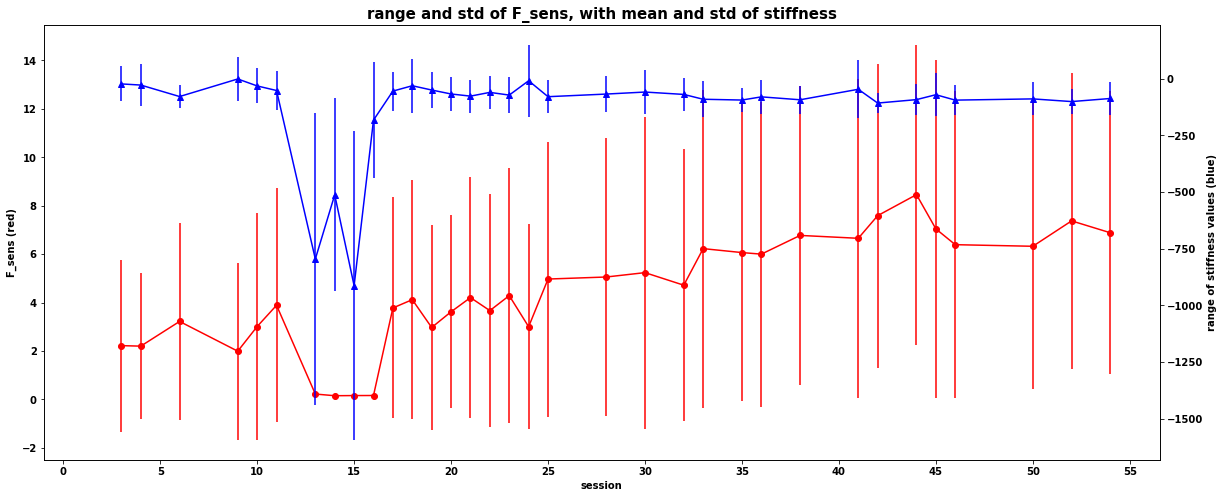

In [126]:
fig,ax=plt.subplots(figsize=(20,8))
ax.errorbar(df_combined['session_nr'],df_combined['F_sens_mean'],df_combined['F_sens_std'],color='red',marker='o')
ax.set_xlabel('session')
plt.xlim(left=-1)
ax.set_ylabel('F_sens (red)')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))

ax2=ax.twinx()
# Kx_mean (inc neg values) in session
ax2.errorbar(df_combined['session_nr'],df_combined['kx_mean'],df_combined['kx_std'],color='blue',marker='^')
ax2.set_ylabel('range of stiffness values (blue)')
plt.title('range and std of F_sens, with mean and std of stiffness',fontsize=15);
plt.show();

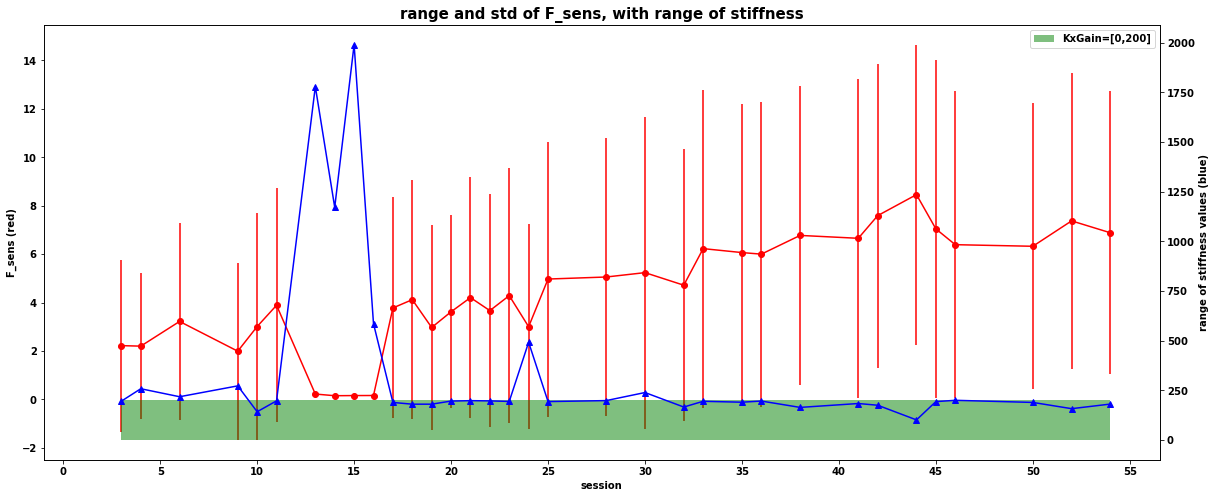

In [127]:
fig,ax=plt.subplots(figsize=(20,8))
ax.errorbar(df_combined['session_nr'],df_combined['F_sens_mean'],df_combined['F_sens_std'],color='red',marker='o')
ax.set_xlabel('session')
plt.xlim(left=-1)
ax.set_ylabel('F_sens (red)')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))

ax2=ax.twinx()
# Kx_range (pos values, max-min) in session
ax2.plot(df_combined['session_nr'],df_combined['Kx_range'],color='blue',marker='^')
ax2.set_ylabel('range of stiffness values (blue)')

ax2.fill_between(df_combined['session_nr'], 0, 200, facecolor='green',alpha=0.5,label='KxGain=[0,200]')
plt.legend()
plt.title('range and std of F_sens, with range of stiffness',fontsize=15);
plt.show();

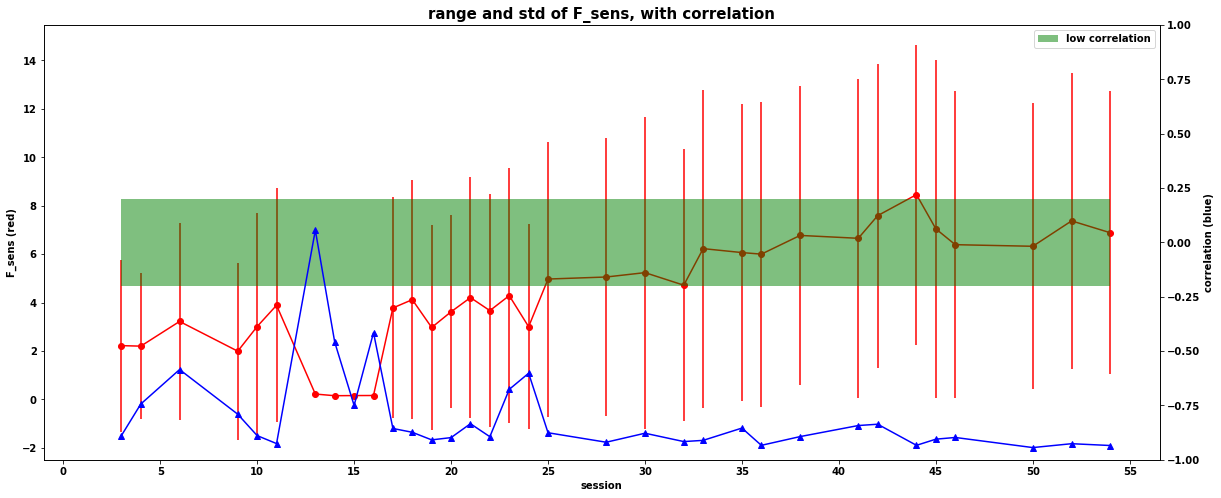

In [128]:
fig,ax=plt.subplots(figsize=(20,8))
ax.errorbar(df_combined['session_nr'],df_combined['F_sens_mean'],df_combined['F_sens_std'],color='red',marker='o')
ax.set_xlabel('session')
plt.xlim(left=-1)
ax.set_ylabel('F_sens (red)')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))

ax2=ax.twinx()
ax2.plot(df_combined['session_nr'],df_combined['haptics_rho'],color='blue',marker='^')
ax2.set_ylabel('correlation (blue)')
ax2.set_ylim(-1,1)

ax2.fill_between(df_combined['session_nr'], -0.2, 0.2, facecolor='green',alpha=0.5,label='low correlation')
plt.legend()
plt.title('range and std of F_sens, with correlation',fontsize=15);
plt.show();

In [129]:
print(f'total run time = {datetime.now()-start_codes}')

total run time = 0:44:18.649315
